In [1]:
# SDA_과제#5_4조(신지운, 민영은, 장동규, 조민규)
# ONLY PULL AND PUSH 'SDA.ipynb'!
# 작업 후 Stash란 Summary에 성명을, Description에 작업 내용을 간단하게 요약해서 Commit 해주세요

In [23]:
# About Project
# 프로젝트 목표 : 미세먼지 농도의 변화는 대중교통 이용률에 영향을 미치는가?

# 각 Page별 목적을 여기에 간단히 정리해주세요
# Page는 항상 EDA - 가설검정 - 회귀분석 순서로 내림차순 정렬을 유지해주세요

# Page0 - 필요 패키지 설치
# Page1 - 데이터 년도 선정 과정 및 이유 -> 논의 중
# Page2 - 지하철-미세먼지 데이터 EDA(미세먼지, 지하철 이용인원 데이터 필터링, 시각화 및 데이터 병합 등)
# Page3 - 버스-미세먼지 데이터 EDA(미세먼지, 버스 이용인원 데이터 필터링, 시각화 및 데이터 병합 등)
# Page4 - 이상치 상세조사, 대중교통 이용 인원 boxplot
# Page5 - EDA 결과 요약
# Page6~7 - 가설 설정과 정규성 검사 및 Q-Qplot
# Page8~9 - 로그화한 데이터에 대하여 정규성 검사 및 Q-Qplot
# page10- kruskal 검정 진행
# Page11- 데이터를 변환한 후 미세먼지의 등급(불연속)을 기반으로 spearman test
# page12- 데이터를 변환한 후 미세먼지의 농도(연속)를 기반으로 spearman test
# Page13 - 미세먼지 종류, 농도와 대중교통 이용인원간의 상관관계 분석
# page14- 가설검정 결과 요약
# page- 회귀분석
# page- 회귀분석 결과
# page- 전체 결론

In [24]:
# Page0
# import package here!

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import glob
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu
import warnings
import statsmodels.formula.api as smf

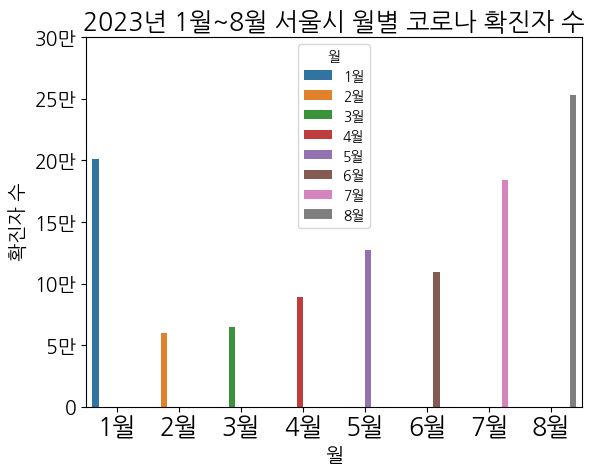

2023년 1월~8월 서울시 월별 코로나 평균 확진자 수: 136203 명


In [25]:
# Page1 - 데이터 년도 선정 과정 및 이유

# 코로나가 대중교통량에 영향을 줄 수도 있다고 판단
# 코로나 국내 첫 감염자 발생 날짜(2020-01-19), 사회적 거리두기 종료 날짜(2022-04-18) 고려
# 코로나 발생 전 연도인 2019년과 사회적 거리두기 종료 후 다음 년도인 2023년 둘 중 하나 선택
# 2023년도 서울시 월 평균 코로나 확진자 수를 확인 후 결정  -> 아예 코로나의 영향을 제외하기 위해 발병 전 가장 최근인 19년도로 선택했다는 어떤가요?
# -> 확진자 수가 영향을 주는지 정확히 잘모르기 때문에 코로나의 영향을 제외하기 전 가장 최신 데이터를 선택했다는 게 더 좋은 것 같습니다.

# 2023년도 서울시 1~8월 확진자수 확인(23년 9월부터 코로나 감염병이 4급으로 전환됨에 따라 데이터 업데이트 중단)
data_covid = pd.read_csv("질병관리청_코로나19 시군구별 월별 확진자 및 사망 발생 현황_20230831.csv")
seoul_covid = data_covid.iloc[1,42:50].values
months = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월']
seoul_covid_df = pd.DataFrame({'월': months, '확진자 수': [int(val.replace(',', '')) for val in seoul_covid]})
mpl.rcParams['font.family'] = 'NanumGothic'
sns.barplot(data=seoul_covid_df,x="월",y="확진자 수",hue="월")
plt.title("2023년 1월~8월 서울시 월별 코로나 확진자 수")
plt.yticks(ticks=range(0, 300001, 50000),labels=['0', '5만', '10만', '15만', '20만', '25만', '30만'])
plt.show()
print("2023년 1월~8월 서울시 월별 코로나 평균 확진자 수:",round(seoul_covid_df["확진자 수"].mean()),"명")



plt.rcParams['axes.titlesize'] = 20  # 제목 폰트 크기
plt.rcParams['axes.labelsize'] = 18  # x, y 라벨 폰트 크기
plt.rcParams['xtick.labelsize'] = 16 # x축 틱 라벨 폰트 크기
plt.rcParams['ytick.labelsize'] = 16  # y축 틱 라벨 폰트 크기





# 2023년 1월~8월 서울시 월별 평균 확진자 수: 136203
# 2023년 월평균 확진자 수가 13만명 이기에 2023년도 데이터가 아닌 2019년도 데이터로 결정

**19년도 서울시 자치구별, 시간별 미세먼지 데이터
                      일시   구분  미세먼지(PM10)  초미세먼지(PM25)
0       2019-12-31 23:00   평균        23.0         15.0
1       2019-12-31 23:00  강남구        19.0         15.0
2       2019-12-31 23:00  강동구        25.0         18.0
3       2019-12-31 23:00  강북구        25.0         16.0
4       2019-12-31 23:00  강서구        29.0         17.0
...                  ...  ...         ...          ...
227755   2019-01-01 0:00  용산구        31.0         22.0
227756   2019-01-01 0:00  은평구        35.0         23.0
227757   2019-01-01 0:00  종로구        36.0         21.0
227758   2019-01-01 0:00   중구        39.0         26.0
227759   2019-01-01 0:00  중랑구        36.0         26.0

[227760 rows x 4 columns]

**대중교통 운행 시간을 고려한 19년도 서울시 일별 미세먼지 데이터
             날짜  미세먼지(PM10)  초미세먼지(PM25)
0    2019-01-01       37.45        24.55
1    2019-01-02       35.55        22.90
2    2019-01-03       39.95        24.20
3    2019-01-04       61.05        42.25
4    2019-01-05       54.85        31.

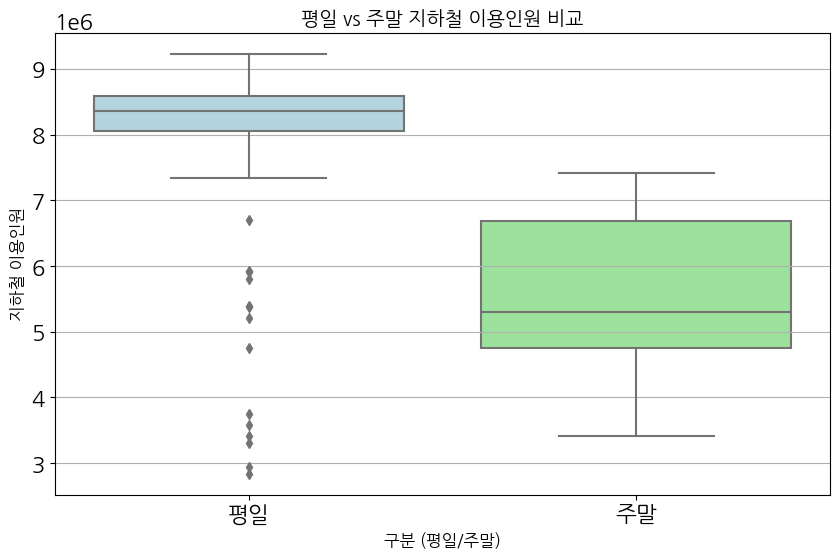

**주말 데이터
            날짜  미세먼지(PM10)  초미세먼지(PM25) 미세먼지 등급 초미세먼지 등급  지하철이용인원   요일 요일구분
4   2019-01-05       54.85        31.35      보통       보통  6062294  토요일   주말
5   2019-01-06       49.10        23.70      보통       보통  4408718  일요일   주말
11  2019-01-12       96.20        69.50      나쁨       나쁨  6282189  토요일   주말
12  2019-01-13      116.50        83.80      나쁨     매우나쁨  4501053  일요일   주말
18  2019-01-19       94.80        66.45      나쁨       나쁨  6259796  토요일   주말
..         ...         ...          ...     ...      ...      ...  ...  ...
348 2019-12-15       36.95        25.00      보통       보통  4968511  일요일   주말
354 2019-12-21       35.45        24.30      보통       보통  7139298  토요일   주말
355 2019-12-22       60.40        45.20      보통       나쁨  5108439  일요일   주말
361 2019-12-28       43.65        25.85      보통       보통  6567343  토요일   주말
362 2019-12-29       44.30        27.10      보통       보통  4756871  일요일   주말

[104 rows x 8 columns]

**평일 데이터
            날짜  미세먼지(PM10)  초미세먼지(PM25) 미세먼지 

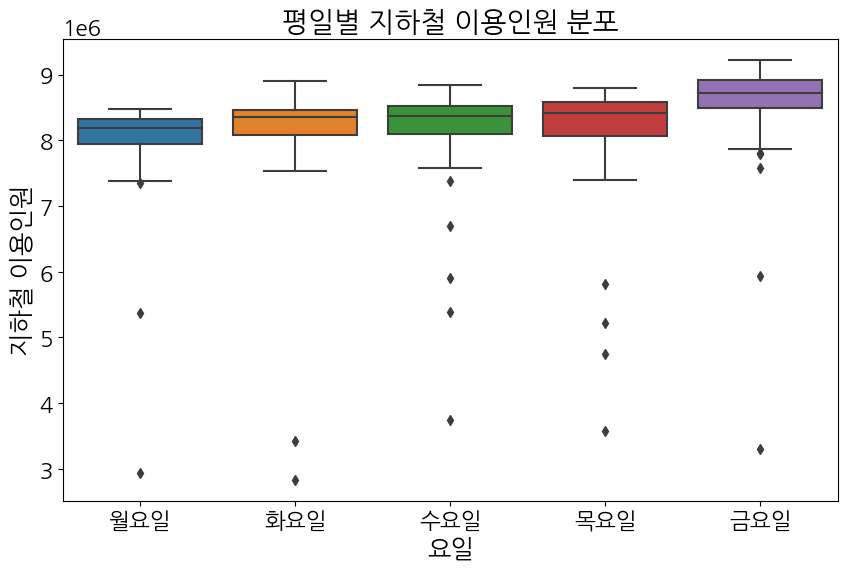

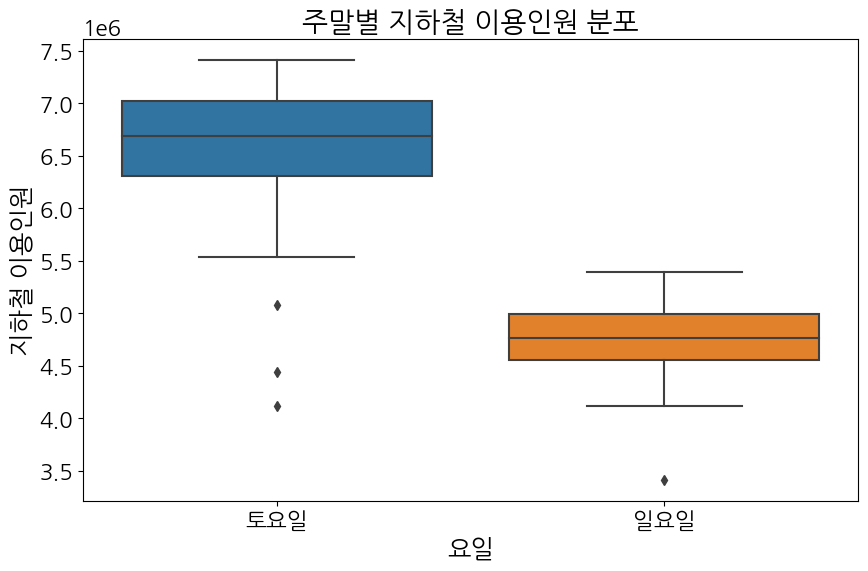

주말 데이터에서 특정 날짜 존재 여부:
Empty DataFrame
Columns: [날짜, 미세먼지(PM10), 초미세먼지(PM25), 미세먼지 등급, 초미세먼지 등급, 지하철이용인원, 요일, 요일구분]
Index: []
평일 데이터에서 특정 날짜 존재 여부:
            날짜  미세먼지(PM10)  초미세먼지(PM25) 미세먼지 등급 초미세먼지 등급  지하철이용인원   요일 요일구분
0   2019-01-01       37.45        24.55      보통       보통  3419948  화요일   평일
35  2019-02-05       90.05        28.15      나쁨       보통  2837335  화요일   평일
255 2019-09-13       14.50         6.45      좋음       좋음  3308479  금요일   평일
---------------after remove outlier--------------------
주말 데이터에서 특정 날짜 존재 여부:
Empty DataFrame
Columns: [날짜, 미세먼지(PM10), 초미세먼지(PM25), 미세먼지 등급, 초미세먼지 등급, 지하철이용인원, 요일, 요일구분]
Index: []
평일 데이터에서 특정 날짜 존재 여부:
Empty DataFrame
Columns: [날짜, 미세먼지(PM10), 초미세먼지(PM25), 미세먼지 등급, 초미세먼지 등급, 지하철이용인원, 요일, 요일구분]
Index: []


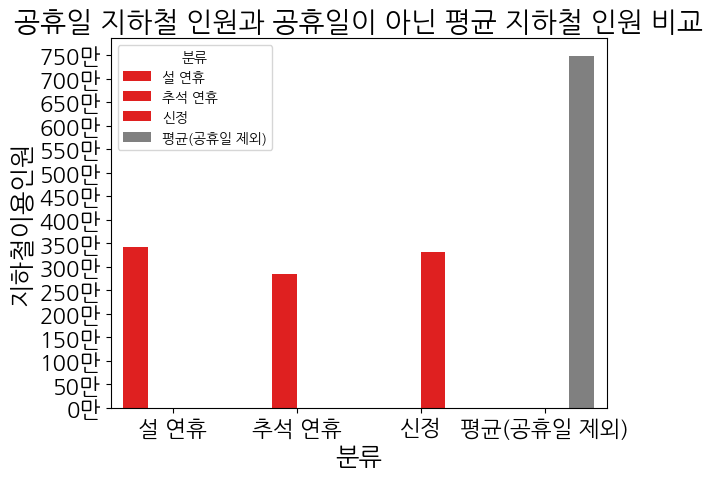

공휴일 평균 지하철이용 인원: 3188587
공휴일이 아닌 평균 지하철이용 인원: 7478289
공휴일이 공휴일이 아닌 평균 지하철 이용 인원의 약 0.43 배

주중, 주말 비교 

주중 정규성 검정: Statistic=0.5817187428474426, p-value=1.2007245921912232e-24
주말 정규성 검정: Statistic=0.9067517518997192, p-value=2.0087536540813744e-06
정규성을 만족하지 않는 데이터가 있습니다.
Mann-Whitney U Test: Statistic=26127.0, p-value=2.6243325046465837e-43
주중과 주말의 지하철 이용인원에 유의미한 차이가 있습니다.


토요일, 일요일 비교 

토요일 정규성 검정: Statistic=0.858296275138855, p-value=1.88970698218327e-05
일요일 정규성 검정: Statistic=0.938680112361908, p-value=0.009901098906993866
정규성을 만족하지 않는 데이터가 있습니다.
Mann-Whitney U Test: Statistic=2598.0, p-value=5.622569078080591e-16
토요일과 일요일의 지하철 이용인원에 유의미한 차이가 있습니다.


In [26]:
# Page2 - 데이터 준비(미세먼지, 지하철 이용인원 데이터 필터링, column생성 및 데이터 병합 등)

# 19년도 서울시 자치구별, 시간별 미세먼지 데이터 준비
air_df = pd.read_csv("서울시 대기질 자료 제공_2016-2019.csv")
air_df_19 = air_df[air_df['일시'].str.startswith('2019')].copy()
print("**19년도 서울시 자치구별, 시간별 미세먼지 데이터")
print(air_df_19)
#----------------------------------------------------------------------------------------------------

# 하루 미세먼지 농도를 모든 시간대의 평균값으로 사용?
# 대중교통은 새벽 시간대 운행 X, 첫차 시간과 막차 시간을 고려해서 새벽시간대의 미세먼지 데이터를 제거}
# 나머지 시간대(05~24시)의 미세먼지 데이터의 평균 값을 하루 미세먼지의 값으로 사용
air_df_19['시간'] = pd.to_datetime(air_df_19['일시']).dt.hour.copy()
air_df_19 = air_df_19[(air_df_19['시간'] >= 5) | (air_df_19['시간'] == 0)]
air_df_19 = air_df_19[air_df_19["구분"] == "평균"].copy()
air_df_19['날짜'] = pd.to_datetime(air_df_19['일시']).dt.date
air_df_19 = air_df_19.groupby(['구분', '날짜'], as_index=False)[['미세먼지(PM10)', '초미세먼지(PM25)']].mean()
air_df_19["미세먼지(PM10)"] = round(air_df_19["미세먼지(PM10)"],2)
air_df_19["초미세먼지(PM25)"] = round(air_df_19["초미세먼지(PM25)"],2)
air_df_19.drop(columns=["구분"],inplace = True)
print("\n**대중교통 운행 시간을 고려한 19년도 서울시 일별 미세먼지 데이터")
print(air_df_19)
#----------------------------------------------------------------------------------------------------

# 미세먼지 농도에 따라 좋음,보통,나쁨,매우나쁨 추가
# 미세먼지(PM10) 기준(0~30: 좋음, 31~80: 보통, 81~150: 나쁨, 151이상: 매우나쁨)
# 초미세먼지(PM25) 기준(0~15: 좋음, 16~35: 보통, 36~75: 나쁨, 76이상: 매우나쁨
def categorize_pm10(value):
    if value <= 30:
        return "좋음"
    elif value <= 80:
        return "보통"
    elif value <= 150:
        return "나쁨"
    else:
        return "매우나쁨"
def categorize_pm25(value):
    if value <= 15:
        return "좋음"
    elif value <= 35:
        return "보통"
    elif value <= 75:
        return "나쁨"
    else:
        return "매우나쁨"
air_df_19["미세먼지 등급"] = air_df_19["미세먼지(PM10)"].apply(categorize_pm10)
air_df_19["초미세먼지 등급"] = air_df_19["초미세먼지(PM25)"].apply(categorize_pm25)
print("\n**미세먼지 농도에 따라 범주화")
print(air_df_19)
#----------------------------------------------------------------------------------------------------

# 19년도 서울시 지하철 이용인원 데이터 준비
sub_df_19 = pd.read_csv("CARD_SUBWAY_MONTH_2019.csv", encoding='euc-kr')
sub_df_19['날짜'] = pd.to_datetime(sub_df_19['사용일자'], format='%Y%m%d')
sub_df_19 = sub_df_19.groupby('날짜')['승차총승객수'].sum().reset_index()
sub_df_19.rename(columns={'승차총승객수': '지하철이용인원'}, inplace=True)
sub_df_19['지하철이용인원'] = sub_df_19['지하철이용인원'].astype(int)
print("\n**19년도 서울시 지하철이용인원")
print(sub_df_19)
#----------------------------------------------------------------------------------------------------

# 미세먼지와 지하철 이용인원 데이터 병합
air_df_19['날짜'] = pd.to_datetime(air_df_19['날짜'])
air_sub_19 = pd.merge(air_df_19, sub_df_19, on='날짜', how='inner')
print("\n**미세먼지, 지하철 이용인원 데이터 병합")
print(air_sub_19)
#----------------------------------------------------------------------------------------------------

# 평일과 주말(토,일) 구분을 위한 요일 column, 요일 구분 column 추가
air_sub_19['요일'] = air_sub_19['날짜'].dt.day_name(locale='ko_KR')
print("\n**평일과 주말(토,일)을 구분하기 위한 요일 column, 요일 구분 column추가")
air_sub_19['요일구분'] = air_sub_19['요일'].apply(lambda x: '주말' if x in ['토요일', '일요일'] else '평일')
print(air_sub_19,"\n")

#----------------------------------------------------------------------------------------------------
# 출퇴근 여부가 대중교통인원에 주는 영향을 고려 해 평일과 주말 데이터를 분리

# air_sub_19 데이터에서 '요일구분'을 기준으로 박스플롯 생성
plt.figure(figsize=(10, 6))
sns.boxplot(x='요일구분', y='지하철이용인원', data=air_sub_19, palette=['lightblue', 'lightgreen'])
plt.title('평일 vs 주말 지하철 이용인원 비교', fontsize=14)
plt.xlabel('구분 (평일/주말)', fontsize=12)
plt.ylabel('지하철 이용인원', fontsize=12)
plt.grid(True, axis='y')
plt.show()




# air_sub_19: 필터링한 미세먼지,지하철이용인원 전체 데이터
# air_sub_weekend_19: air_sub_19의 주말 데이터
# air_sub_weekday_19: air_sub_19의 평일 데이터
air_sub_weekend_19 = air_sub_19[air_sub_19["요일구분"]=="주말"]
air_sub_weekday_19 = air_sub_19[air_sub_19["요일구분"]=="평일"]
print("**주말 데이터")
print(air_sub_weekend_19)
print("\n**평일 데이터")
print(air_sub_weekday_19)

#----------------------------------------------------------------------------------------------------

# 평일과 주말 각각 데이터 분포 시각화. 이상치 확인

plt.figure(figsize=(10, 6))
sns.boxplot(x='요일', y='지하철이용인원', data=air_sub_weekday_19, order=['월요일', '화요일', '수요일', '목요일', '금요일'])
plt.title('평일별 지하철 이용인원 분포')
plt.xlabel('요일')
plt.ylabel('지하철 이용인원')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='요일', y='지하철이용인원', data=air_sub_weekend_19, order=['토요일', '일요일'])
plt.title('주말별 지하철 이용인원 분포')
plt.xlabel('요일')
plt.ylabel('지하철 이용인원')
plt.show()


#----------------------------------------------------------------------------------------------------

# 이상치 제거 및 공휴일 확인 -> 이상치를 확인해보고 그 이상치들 중 특정 공휴일의 값은 미세먼지의 영향에 의한 데이터가 아니기 때문에 삭제하는 게 맞는 것 같습니다.
# 근데 IQR값으로 확인했을 때 범위에 해당하는 모든 데이터를 삭제하는 건 조금 위험한 것 같습니다.
# 그 범위에 해당하는 값이 미세먼지가 아닌 다른 요소로 인해 값이 튄건지를 확인 후에 제거를 해야할 것 같습니다.
# 지금 당장 생각나는건 2019년도에 대중교통 파업이 언제였는지 확인 후에 만약 그 날짜가 IQR값으로 확인 했던 범위에 있는 이상치라면 제거하는 식으로 진행하는 방법이 있을 것 같습니다. 

specific_dates = ['2019-02-05', '2019-09-13', '2019-01-01'] #확인해볼 공휴일
weekend_check = air_sub_weekend_19[air_sub_weekend_19['날짜'].isin(pd.to_datetime(specific_dates))]
weekday_check = air_sub_weekday_19[air_sub_weekday_19['날짜'].isin(pd.to_datetime(specific_dates))]

print("주말 데이터에서 특정 날짜 존재 여부:")
print(weekend_check)

print("평일 데이터에서 특정 날짜 존재 여부:")
print(weekday_check)

print("---------------after remove outlier--------------------")

def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # 1사분위수
    Q3 = data[column].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

air_sub_weekend_cleaned = remove_outliers(air_sub_weekend_19, '지하철이용인원')
air_sub_weekday_cleaned = remove_outliers(air_sub_weekday_19, '지하철이용인원')

weekend_check = air_sub_weekend_cleaned[air_sub_weekend_cleaned['날짜'].isin(pd.to_datetime(specific_dates))]
weekday_check = air_sub_weekday_cleaned[air_sub_weekday_cleaned['날짜'].isin(pd.to_datetime(specific_dates))]

print("주말 데이터에서 특정 날짜 존재 여부:")
print(weekend_check)

print("평일 데이터에서 특정 날짜 존재 여부:")
print(weekday_check)

#----------------------------------------------------------------------------------------------------

# 특정 공휴일(설 연휴, 추석 연휴, 신정)이 대중교통이용인원에 다른 값을 보이는지 barplot을 이용하여 시각화
# 설 연휴: 2019/02/05, 추석 연휴: 2019/9/13, 신정: 2019/01/01
holidays = ['2019-02-05', '2019-09-13', '2019-01-01']
holidays = pd.to_datetime(holidays)
holiday_data = air_sub_19[air_sub_19['날짜'].isin(holidays)][['날짜', '지하철이용인원']]
average_non_holiday = air_sub_19[~air_sub_19['날짜'].isin(holidays)]['지하철이용인원'].mean()
bar_data = pd.DataFrame({'분류': ['설 연휴', '추석 연휴', '신정', '평균(공휴일 제외)'],
    '지하철이용인원': list(holiday_data['지하철이용인원']) + [average_non_holiday]})
sns.barplot(data = bar_data, x = "분류", y = "지하철이용인원", palette=["red","red","red","gray"],hue="분류")
max_value = bar_data['지하철이용인원'].max()
step = 500000  
plt.yticks(ticks=range(0, int(max_value) + step, step),labels=[f'{x//10000}만' for x in range(0, int(max_value) + step, step)])
plt.title("공휴일 지하철 인원과 공휴일이 아닌 평균 지하철 인원 비교")
plt.show()
print("공휴일 평균 지하철이용 인원:",round(holiday_data["지하철이용인원"].mean()))
print("공휴일이 아닌 평균 지하철이용 인원:",round(average_non_holiday))
print("공휴일이 공휴일이 아닌 평균 지하철 이용 인원의 약",round(holiday_data["지하철이용인원"].mean()/(average_non_holiday),2),
      "배\n")






#----------------------------------------------------------------------------------------------------------

#boxplot에 따른 토요일, 일요일 구분

air_sub_weekend_cleaned_sat = air_sub_weekend_cleaned[air_sub_weekend_cleaned["요일"]=="토요일"]
air_sub_weekend_cleaned_sun = air_sub_weekend_cleaned[air_sub_weekend_cleaned["요일"]=="일요일"]

air_sub_weekend_cleaned_sat.head()
air_sub_weekend_cleaned_sun.head()

#-------------------------------------------------------



#----------------------------------------------------------------------------------------------------------
#추가 --- 주중, 주말/ 토, 일간에 차이가 수치적으로도 유의미하게 나오는가
#모두 유의미한 차이를 보인다.
print("주중, 주말 비교", "\n")

# 정규성 검정: 주중
stat_weekday, p_weekday = shapiro(air_sub_weekday_19['지하철이용인원'])
print(f"주중 정규성 검정: Statistic={stat_weekday}, p-value={p_weekday}")

# 정규성 검정: 주말
stat_weekend, p_weekend = shapiro(air_sub_weekend_19['지하철이용인원'])
print(f"주말 정규성 검정: Statistic={stat_weekend}, p-value={p_weekend}")

# 결과 해석
if p_weekday >= 0.05 and p_weekend >= 0.05:
    print("주중 및 주말 데이터 모두 정규성을 만족합니다.")
else:
    print("정규성을 만족하지 않는 데이터가 있습니다.")

stat_mwu, p_mwu = mannwhitneyu(
    air_sub_weekday_19['지하철이용인원'], 
    air_sub_weekend_19['지하철이용인원']
)
print(f"Mann-Whitney U Test: Statistic={stat_mwu}, p-value={p_mwu}")

# 결과 해석
if p_mwu < 0.05:
    print("주중과 주말의 지하철 이용인원에 유의미한 차이가 있습니다.")
else:
    print("주중과 주말의 지하철 이용인원에 유의미한 차이가 없습니다.")
print("\n")


print("토요일, 일요일 비교", "\n")

# 정규성 검정: 토요일
stat_sat, p_sat = shapiro(air_sub_weekend_cleaned_sat['지하철이용인원'])
print(f"토요일 정규성 검정: Statistic={stat_sat}, p-value={p_sat}")

# 정규성 검정: 일요일
stat_sun, p_sun = shapiro(air_sub_weekend_cleaned_sun['지하철이용인원'])
print(f"일요일 정규성 검정: Statistic={stat_sun}, p-value={p_sun}")

# 결과 해석
if p_sat >= 0.05 and p_sun >= 0.05:
    print("토요일 및 일요일 데이터 모두 정규성을 만족합니다.")
else:
    print("정규성을 만족하지 않는 데이터가 있습니다.")

stat_mwu, p_mwu = mannwhitneyu(
    air_sub_weekend_cleaned_sat['지하철이용인원'], 
    air_sub_weekend_cleaned_sun['지하철이용인원']
)
print(f"Mann-Whitney U Test: Statistic={stat_mwu}, p-value={p_mwu}")

# 결과 해석
if p_mwu < 0.05:
    print("토요일과 일요일의 지하철 이용인원에 유의미한 차이가 있습니다.")
else:
    print("토요일과 일요일의 지하철 이용인원에 유의미한 차이가 없습니다.")



            날짜   버스이용인원
0   2019-01-01  2421369
1   2019-01-02  5328586
2   2019-01-03  5457074
3   2019-01-04  5613975
4   2019-01-05  4050127
..         ...      ...
360 2019-12-27  5930615
361 2019-12-28  4270697
362 2019-12-29  3239593
363 2019-12-30  5593464
364 2019-12-31  5396759

[365 rows x 2 columns]

**미세먼지, 버스이용인원 데이터 병합
            날짜  미세먼지(PM10)  초미세먼지(PM25) 미세먼지 등급 초미세먼지 등급   버스이용인원
0   2019-01-01       37.45        24.55      보통       보통  2421369
1   2019-01-02       35.55        22.90      보통       보통  5328586
2   2019-01-03       39.95        24.20      보통       보통  5457074
3   2019-01-04       61.05        42.25      보통       나쁨  5613975
4   2019-01-05       54.85        31.35      보통       보통  4050127
..         ...         ...          ...     ...      ...      ...
360 2019-12-27       34.80        23.65      보통       보통  5930615
361 2019-12-28       43.65        25.85      보통       보통  4270697
362 2019-12-29       44.30        27.10      보통       보통  3239593
363 2

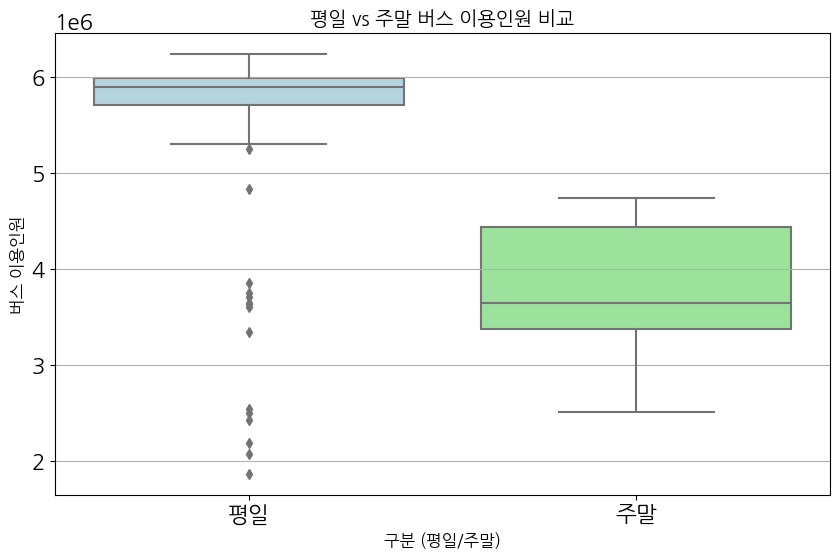

**주말 데이터
            날짜  미세먼지(PM10)  초미세먼지(PM25) 미세먼지 등급 초미세먼지 등급   버스이용인원   요일 요일구분
4   2019-01-05       54.85        31.35      보통       보통  4050127  토요일   주말
5   2019-01-06       49.10        23.70      보통       보통  3118038  일요일   주말
11  2019-01-12       96.20        69.50      나쁨       나쁨  4119460  토요일   주말
12  2019-01-13      116.50        83.80      나쁨     매우나쁨  3095130  일요일   주말
18  2019-01-19       94.80        66.45      나쁨       나쁨  4096367  토요일   주말
..         ...         ...          ...     ...      ...      ...  ...  ...
348 2019-12-15       36.95        25.00      보통       보통  3380539  일요일   주말
354 2019-12-21       35.45        24.30      보통       보통  4532238  토요일   주말
355 2019-12-22       60.40        45.20      보통       나쁨  3517719  일요일   주말
361 2019-12-28       43.65        25.85      보통       보통  4270697  토요일   주말
362 2019-12-29       44.30        27.10      보통       보통  3239593  일요일   주말

[104 rows x 8 columns]

**평일 데이터
            날짜  미세먼지(PM10)  초미세먼지(PM25) 미세먼지 

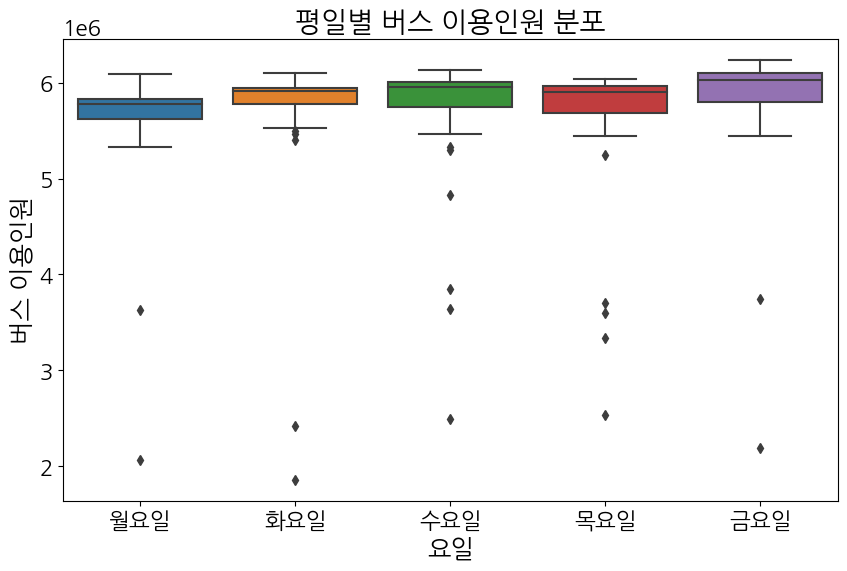

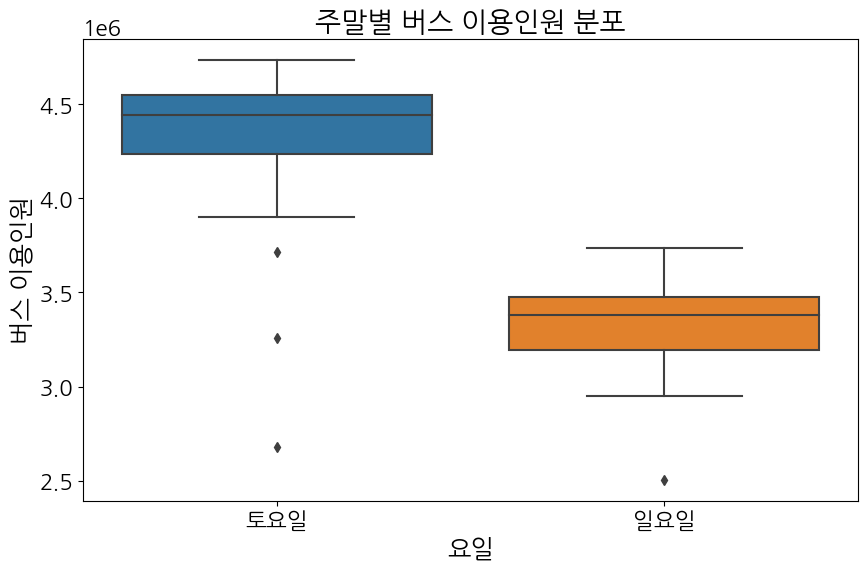

주말 데이터에서 특정 날짜 존재 여부:
Empty DataFrame
Columns: [날짜, 미세먼지(PM10), 초미세먼지(PM25), 미세먼지 등급, 초미세먼지 등급, 버스이용인원, 요일, 요일구분]
Index: []
평일 데이터에서 특정 날짜 존재 여부:
            날짜  미세먼지(PM10)  초미세먼지(PM25) 미세먼지 등급 초미세먼지 등급   버스이용인원   요일 요일구분
0   2019-01-01       37.45        24.55      보통       보통  2421369  화요일   평일
35  2019-02-05       90.05        28.15      나쁨       보통  1862627  화요일   평일
255 2019-09-13       14.50         6.45      좋음       좋음  2188402  금요일   평일
---------------after remove outlier--------------------
주말 데이터에서 특정 날짜 존재 여부:
Empty DataFrame
Columns: [날짜, 미세먼지(PM10), 초미세먼지(PM25), 미세먼지 등급, 초미세먼지 등급, 버스이용인원, 요일, 요일구분]
Index: []
평일 데이터에서 특정 날짜 존재 여부:
Empty DataFrame
Columns: [날짜, 미세먼지(PM10), 초미세먼지(PM25), 미세먼지 등급, 초미세먼지 등급, 버스이용인원, 요일, 요일구분]
Index: []


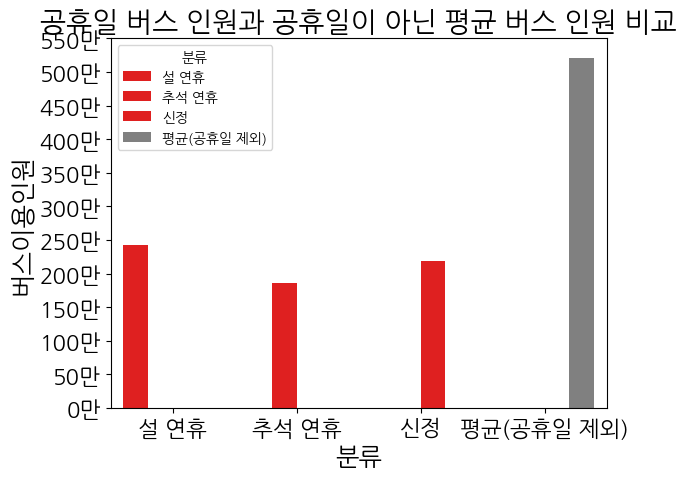

공휴일 평균 버스 이용 인원: 2157466
공휴일이 아닌 평균 버스이용 인원: 5200975
공휴일이 공휴일이 아닌 평균 버스 이용 인원의 약 0.41 배



,날짜,미세먼지(PM10),초미세먼지(PM25),미세먼지 등급,초미세먼지 등급,버스이용인원,요일,요일구분
5,2019-01-06,49.10,23.70,보통,보통,3118038,일요일,주말
12,2019-01-13,116.50,83.80,나쁨,매우나쁨,3095130,일요일,주말
19,2019-01-20,60.70,26.50,보통,보통,3143037,일요일,주말
26,2019-01-27,35.65,20.45,보통,보통,3187519,일요일,주말
33,2019-02-03,32.90,26.05,보통,보통,2504108,일요일,주말


In [27]:
# Page3 - 버스 데이터도 page2의 지하철과 같은 과정으로 진행

# 19년도 서울시 버스 이용인원 데이터 준비

# 12개의 csv파일 통합 및 요약
file_path = 'Bus/*.csv'
all_files = glob.glob(file_path)

dfs = []
for file in all_files:
    df = pd.read_csv(file, encoding='euc-kr')
    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)
merged_df['날짜'] = pd.to_datetime(merged_df['사용일자'], format='%Y%m%d')
bus_df_19 = merged_df.sort_values(by='날짜')
bus_df_19 = bus_df_19[['날짜', '승차총승객수']]
bus_df_19 = bus_df_19.rename(columns={'승차총승객수': '버스이용인원'})
bus_df_19 = bus_df_19.groupby('날짜')['버스이용인원'].sum().reset_index()

print(bus_df_19)

#----------------------------------------------------------------------------------------------------

# 미세먼지와 버스이용인원 데이터 병합
air_bus_19 = pd.merge(air_df_19, bus_df_19, on='날짜', how='inner')
print("\n**미세먼지, 버스이용인원 데이터 병합")
print(air_bus_19)
#----------------------------------------------------------------------------------------------------

# 평일과 주말(토,일) 구분을 위한 요일 column, 요일 구분 column 추가
air_bus_19['요일'] = air_bus_19['날짜'].dt.day_name(locale='ko_KR')
print("\n**평일과 주말(토,일)을 구분하기 위한 요일 column, 요일 구분 column추가")
air_bus_19['요일구분'] = air_bus_19['요일'].apply(lambda x: '주말' if x in ['토요일', '일요일'] else '평일')
print(air_bus_19,"\n")

#----------------------------------------------------------------------------------------------------

# 출퇴근 여부가 버스이용인원에 주는 영향을 고려 해 평일과 주말 데이터를 분리

# air_bus_19 데이터에서 '요일구분'을 기준으로 박스플롯 생성
plt.figure(figsize=(10, 6))
sns.boxplot(x='요일구분', y='버스이용인원', data=air_bus_19, palette=['lightblue', 'lightgreen'])
plt.title('평일 vs 주말 버스 이용인원 비교', fontsize=14)
plt.xlabel('구분 (평일/주말)', fontsize=12)
plt.ylabel('버스 이용인원', fontsize=12)
plt.grid(True, axis='y')
plt.show()


air_bus_weekend_19 = air_bus_19[air_bus_19["요일구분"]=="주말"]
air_bus_weekday_19 = air_bus_19[air_bus_19["요일구분"]=="평일"]
print("**주말 데이터")
print(air_bus_weekend_19)
print("\n**평일 데이터")
print(air_bus_weekday_19)

#----------------------------------------------------------------------------------------------------

# 평일과 주말 각각 데이터 분포 시각화. 이상치 확인

plt.figure(figsize=(10, 6))
sns.boxplot(x='요일', y='버스이용인원', data=air_bus_weekday_19, order=['월요일', '화요일', '수요일', '목요일', '금요일'])
plt.title('평일별 버스 이용인원 분포')
plt.xlabel('요일')
plt.ylabel('버스 이용인원')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='요일', y='버스이용인원', data=air_bus_weekend_19, order=['토요일', '일요일'])
plt.title('주말별 버스 이용인원 분포')
plt.xlabel('요일')
plt.ylabel('버스 이용인원')
plt.show()

#----------------------------------------------------------------------------------------------------

# 이상치 제거 및 공휴일 확인 -> 이상치를 확인해보고 그 이상치들 중 특정 공휴일의 값은 미세먼지의 영향에 의한 데이터가 아니기 때문에 삭제하는 게 맞는 것 같습니다.
# 근데 IQR값으로 확인했을 때 범위에 해당하는 모든 데이터를 삭제하는 건 조금 위험한 것 같습니다.
# 그 범위에 해당하는 값이 미세먼지가 아닌 다른 요소로 인해 값이 튄건지를 확인 후에 제거를 해야할 것 같습니다.
# 지금 당장 생각나는건 2019년도에 대중교통 파업이 언제였는지 확인 후에  만약 그 날짜가 IQR값으로 확인 했던 범위에 있는 이상치라면 제거하는 식으로 진행하는 방법이 있을 것 같습니다.

specific_dates = ['2019-02-05', '2019-09-13', '2019-01-01'] #확인해볼 공휴일
weekend_check = air_bus_weekend_19[air_bus_weekend_19['날짜'].isin(pd.to_datetime(specific_dates))]
weekday_check = air_bus_weekday_19[air_bus_weekday_19['날짜'].isin(pd.to_datetime(specific_dates))]

print("주말 데이터에서 특정 날짜 존재 여부:")
print(weekend_check)

print("평일 데이터에서 특정 날짜 존재 여부:")
print(weekday_check)

print("---------------after remove outlier--------------------")

air_bus_weekend_cleaned = remove_outliers(air_bus_weekend_19, '버스이용인원')
air_bus_weekday_cleaned = remove_outliers(air_bus_weekday_19, '버스이용인원')

weekend_check = air_bus_weekend_cleaned[air_bus_weekend_cleaned['날짜'].isin(pd.to_datetime(specific_dates))]
weekday_check = air_bus_weekday_cleaned[air_bus_weekday_cleaned['날짜'].isin(pd.to_datetime(specific_dates))]

print("주말 데이터에서 특정 날짜 존재 여부:")
print(weekend_check)

print("평일 데이터에서 특정 날짜 존재 여부:")
print(weekday_check)

#----------------------------------------------------------------------------------------------------

# 특정 공휴일(설 연휴, 추석 연휴, 신정)이 대중교통이용인원에 다른 값을 보이는지 barplot을 이용하여 시각화
# 설 연휴: 2019/02/05, 추석 연휴: 2019/9/13, 신정: 2019/01/01
holidays = ['2019-02-05', '2019-09-13', '2019-01-01']
holidays = pd.to_datetime(holidays)
holiday_data = air_bus_19[air_bus_19['날짜'].isin(holidays)][['날짜', '버스이용인원']]
average_non_holiday = air_bus_19[~air_bus_19['날짜'].isin(holidays)]['버스이용인원'].mean()
bar_data = pd.DataFrame({'분류': ['설 연휴', '추석 연휴', '신정', '평균(공휴일 제외)'],
    '버스이용인원': list(holiday_data['버스이용인원']) + [average_non_holiday]})
sns.barplot(data = bar_data, x = "분류", y = "버스이용인원", palette=["red","red","red","gray"],hue="분류")
max_value = bar_data['버스이용인원'].max()
step = 500000  
plt.yticks(ticks=range(0, int(max_value) + step, step),labels=[f'{x//10000}만' for x in range(0, int(max_value) + step, step)])
plt.title("공휴일 버스 인원과 공휴일이 아닌 평균 버스 인원 비교")
plt.show()
print("공휴일 평균 버스 이용 인원:",round(holiday_data["버스이용인원"].mean()))
print("공휴일이 아닌 평균 버스이용 인원:",round(average_non_holiday))
print("공휴일이 공휴일이 아닌 평균 버스 이용 인원의 약",round(holiday_data["버스이용인원"].mean()/(average_non_holiday),2),
      "배\n")


#----------------------------------------------------------------------------------------------------------

#boxplot에 따른 토요일, 일요일 구분

air_bus_weekend_cleaned_sat = air_bus_weekend_cleaned[air_bus_weekend_cleaned["요일"]=="토요일"]
air_bus_weekend_cleaned_sun = air_bus_weekend_cleaned[air_bus_weekend_cleaned["요일"]=="일요일"]

air_bus_weekend_cleaned_sat.head()
air_bus_weekend_cleaned_sun.head()

#-----------------------------------------------------------------------------


Empty DataFrame
Columns: [날짜, 미세먼지(PM10), 초미세먼지(PM25), 미세먼지 등급, 초미세먼지 등급, 지하철이용인원, 요일, 요일구분]
Index: []
------------------------------------------------------------------
            날짜  미세먼지(PM10)  초미세먼지(PM25) 미세먼지 등급 초미세먼지 등급  지하철이용인원   요일 요일구분
0   2019-01-01       37.45        24.55      보통       보통  3419948  화요일   평일
34  2019-02-04       62.40        31.40      보통       보통  2941955  월요일   평일
35  2019-02-05       90.05        28.15      나쁨       보통  2837335  화요일   평일
36  2019-02-06       94.00        33.40      나쁨       보통  3741895  수요일   평일
59  2019-03-01      121.05        84.45      나쁨     매우나쁨  5930573  금요일   평일
120 2019-05-01       65.65        29.30      보통       보통  6694473  수요일   평일
125 2019-05-06       35.15        10.60      보통       좋음  5369332  월요일   평일
156 2019-06-06       63.70        45.40      보통       나쁨  5214097  목요일   평일
226 2019-08-15        8.00         4.30      좋음       좋음  4754066  목요일   평일
254 2019-09-12       12.20         5.30      좋음       좋음  3582721  목요일

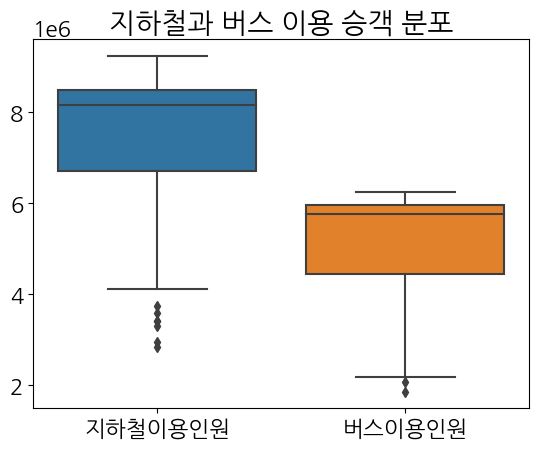

          날짜     이용인원  종류
0 2019-01-01  2421369  버스
1 2019-01-02  5328586  버스
2 2019-01-03  5457074  버스
3 2019-01-04  5613975  버스
4 2019-01-05  4050127  버스


버스이용인원과 지하철이용인원의 비교 

버스 이용인원 정규성 검정: Statistic=0.7897898554801941, p-value=2.2295292279206556e-21
지하철 이용인원 정규성 검정: Statistic=0.8181058764457703, p-value=5.508470348803373e-20
정규성을 만족하지 않는 데이터가 있습니다.
Mann-Whitney U Test: Statistic=18363.0, p-value=2.415111271854332e-64
버스와 지하철 이용인원에 유의미한 차이가 있습니다.


In [28]:
# Page4 - 이상치에 관한 상세조사, 대중교통 이용인원 boxplot
# eda 진행 중 논의를 거쳐 이상값의 단순 제거가 아닌 어떠한 데이터로 구성되어 있는 지 파악해보기로 하였다.

def catch_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # 1사분위수
    Q3 = data[column].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data[column] <= lower_bound) | (data[column] >= upper_bound)]
    return filtered_data

air_sub_weekend_outonly = catch_outliers(air_sub_weekend_19, '지하철이용인원')
air_sub_weekday_outonly = catch_outliers(air_sub_weekday_19, '지하철이용인원')
air_bus_weekend_outonly = catch_outliers(air_bus_weekend_19, '버스이용인원')
air_bus_weekday_outonly = catch_outliers(air_bus_weekday_19, '버스이용인원')


print(air_sub_weekend_outonly)
print("------------------------------------------------------------------")
print(air_sub_weekday_outonly)
print("------------------------------------------------------------------")
print(air_bus_weekend_outonly)
print("------------------------------------------------------------------")
print(air_bus_weekday_outonly)


# 결과 : 이상치가 전부 공휴일이나 대체휴일로만 존재한다. 대중교통의 이용량은 왠만한 원인에 대해선 큰 영향을 받지 않는 모습을 보인다.s

#-------------------------------------------------
# 대중교통 이용인원 boxplot
print("\n---------------------------------\n")
print("버스이용인원과 지하철이용인원의 차이를 보기 위한 boxplot")
bus_sub_19 = pd.merge(air_bus_19,air_sub_19,on="날짜",how = "inner")
sns.boxplot(data=[bus_sub_19["지하철이용인원"],bus_sub_19["버스이용인원"]])
plt.title("지하철과 버스 이용 승객 분포")
plt.xticks([0,1],["지하철이용인원","버스이용인원"])
plt.show()

plt.rcParams['axes.titlesize'] = 18  # 제목 폰트 크기
plt.rcParams['axes.labelsize'] = 14  # x, y 라벨 폰트 크기
plt.rcParams['xtick.labelsize'] = 18  # x축 틱 라벨 폰트 크기
plt.rcParams['ytick.labelsize'] = 14  # y축 틱 라벨 폰트 크기


# 버스 데이터 준비
air_bus_19_cleaned = air_bus_19[['날짜', '버스이용인원']].copy()
air_bus_19_cleaned['종류'] = '버스'

# 지하철 데이터 준비
air_sub_19_cleaned = air_sub_19[['날짜', '지하철이용인원']].copy()
air_sub_19_cleaned['종류'] = '지하철'

# 데이터 병합
combined_data = pd.concat([
    air_bus_19_cleaned.rename(columns={'버스이용인원': '이용인원'}),
    air_sub_19_cleaned.rename(columns={'지하철이용인원': '이용인원'})
])

print(combined_data.head())

print("\n")


#----------------------------------------------------------------------------------------------------------
#버스이용인원과 지하철이용인원도 유의미한 차이가 존재하는가?
#존재한다
print("버스이용인원과 지하철이용인원의 비교", "\n") 

# 정규성 검정
stat_bus, p_bus = shapiro(air_bus_19_cleaned['버스이용인원'])
stat_sub, p_sub = shapiro(air_sub_19_cleaned['지하철이용인원'])

print(f"버스 이용인원 정규성 검정: Statistic={stat_bus}, p-value={p_bus}")
print(f"지하철 이용인원 정규성 검정: Statistic={stat_sub}, p-value={p_sub}")

# 결과 해석
if p_bus >= 0.05 and p_sub >= 0.05:
    print("버스와 지하철 데이터 모두 정규성을 만족합니다.")
else:
    print("정규성을 만족하지 않는 데이터가 있습니다.")


stat_mwu, p_mwu = mannwhitneyu(
    air_bus_19_cleaned['버스이용인원'],
    air_sub_19_cleaned['지하철이용인원']
)
print(f"Mann-Whitney U Test: Statistic={stat_mwu}, p-value={p_mwu}")

# 결과 해석
if p_mwu < 0.05:
    print("버스와 지하철 이용인원에 유의미한 차이가 있습니다.")
else:
    print("버스와 지하철 이용인원에 유의미한 차이가 없습니다.")


# Page5 - EDA 결과 요약

# 기간 설정 : 2019년
# -> 코로나 19는 사회 전반에 미친 영향도 컸고 그 기간 또한 광범위하여 쉽게 통제하기 힘든 noise로 판단된다. 실제로 코로나가 극성이던 시기엔 사람들이 외출을 많이 꺼렸지만 그동안 중국의 공장 가동 중단으로
# 미세먼지가 크게 감소된 사례또한 존재한다. 이에 코로나의 영향을 적절히 조절할 방법을 찾기 힘들다고 결론짓고 코로나에 영향을 받지 않은 기간 중 가장 최근인 2019년의 데이터를 기반으로 조사를 진행한다.

# 데이터 시간 단위 설정 : 일(day)
# 하루 내에서 대중교통의 이용량은 시간에 따라 영향을 강하게 받는다. 대표적으로 출퇴근이 있다. 이에 하루를 데이터의 단위로 정한다. 이는 reference한 연구의 방법하고도 동일하다.

# 제외시간 : 01시 ~ 04시
# 대중교통이 운행하지 않는 시간대의 미세먼지 데이터는 조사 목적를 방해하는 요인으로 작용할 것이다. 이에 해당 시간의 데이터는 제외하고 나머지 시간에 대한 데이터의 평균으로 해당 날짜의 데이터를 정한다.

# 평일-주말 구분
# 대중교통의 이용패턴은 평일과 주말간에 차이가 극명하게 나타난다. 이는 위에 boxplot 시각화를 통한 데이터 분포의 차이로 나타나기도 하였다. 이에 평일과 주말을 분리하여 조사를 진행한다.

# 토요일-일요일 구분
# 추가적인 조사 결과 주말 내에서도 위의 평일-주말과 같이 데이터 분포의 차이가 나타났다. 이에 토요일과 일요일 또한 분리하여 조사를 진행한다.

# 버스-지하철 구분
# 같은 대중교통의 범주에 속한다고 미세먼지의 영향을 동일하게 받는다고 단정 지을 수 없다. 운행 환경의 차이 등 여러 요소를 고려하여 이 둘의 교통수단 또한 분리하여 조사를 진행한다.

# 대중교통 이용 수 이상값 제거 처리
# boxplot을 통해 이상값의 존재를 파악하고 따로 분리하여 확인(page4)해 보았다. 결과는 모든 이상값은 공휴일과 대체휴일에 한정되었다. 해당 기간의 변화는 미세먼지의 영향하고는 무관한바, 제거하여 조사를 진행한다.

# 최종적 조사 종류
# 1. 미세먼지가 버스 이용에 미치는 영향(평일) : DF = 'air_bus_weekday_cleaned' / Col = '버스이용인원' [integer]
# 2. 미세먼지가 버스 이용에 미치는 영향(토요일) : DF = 'air_bus_weekend_cleaned_sat' / Col = '버스이용인원' [integer]
# 3. 미세먼지가 버스 이용에 미치는 영향(일요일) : DF = 'air_bus_weekend_cleaned_sun' / Col = '버스이용인원' [integer]
# 4. 미세먼지가 지하철 이용에 미치는 영향(평일) : DF = 'air_sub_weekday_cleaned' / Col = '지하철이용인원' [integer]
# 5. 미세먼지가 지하철 이용에 미치는 영향(토요일) : DF = 'air_sub_weekend_cleaned_sat' / Col = '지하철이용인원' [integer]
# 6. 미세먼지가 지하철 이용에 미치는 영향(일요일) : DF = 'air_sub_weekend_cleaned_sun' / Col = '지하철이용인원' [integer]

# 추가 DATAFRAME 공통 Column
# => '날짜' [yyyymmdd형식(datetime)]
# => '미세먼지(PM10)' [float]
# => '초미세먼지(PM25)' [float]
# => '미세먼지 등급' [좋음, 보통, 나쁨(string)]
# => '초미세먼지 등급' [좋음, 보통, 나쁨(string)]
# => '요일' [월요일, 화요일, 수요일, 목요일, 금요일, 토요일, 일요일(string)]
# => '요일구분' [평일, 주말(string)]


In [29]:
# Page6
#가설 검정 시작
# H0(귀무가설)- 미세먼지 (Pm 10, Pm2.5) 농도에 따른 대중교통 이용률에 영향을 미치지 않는다
# H1(대립가설)- 미세먼지 (Pm 10, Pm2.5)농도에 따른 대중교통 이용률에 영향을 미친다.

# 데이터들의 정규성 확인


# 정규성 검정
def normality_test_summary(data, columns, label):
    print(f"### {label} ###\n")
    for column in columns:
        stat, p_value = shapiro(data[column])
        conclusion = "Normal" if p_value >= 0.05 else "Not Normal"
        print(f"{column}의 정규성 검정")
        print(f"Statistic: {stat:.6f}, p-value: {p_value:.6f}, Conclusion: {conclusion}\n")

# 데이터셋과 컬럼 정의
datasets = {
    "Bus Weekday": air_bus_weekday_cleaned,
    "Bus Saturday": air_bus_weekend_cleaned_sat,
    "Bus Sunday": air_bus_weekend_cleaned_sun,
    "Subway Weekday": air_sub_weekday_cleaned,
    "Subway Saturday": air_sub_weekend_cleaned_sat,
    "Subway Sunday": air_sub_weekend_cleaned_sun,
}

columns_dict = {
    "Bus Weekday": ["미세먼지(PM10)", "초미세먼지(PM25)", "버스이용인원"],
    "Bus Saturday": ["미세먼지(PM10)", "초미세먼지(PM25)", "버스이용인원"],
    "Bus Sunday": ["미세먼지(PM10)", "초미세먼지(PM25)", "버스이용인원"],
    "Subway Weekday": ["미세먼지(PM10)", "초미세먼지(PM25)", "지하철이용인원"],
    "Subway Saturday": ["미세먼지(PM10)", "초미세먼지(PM25)", "지하철이용인원"],
    "Subway Sunday": ["미세먼지(PM10)", "초미세먼지(PM25)", "지하철이용인원"],
}

# 각 데이터셋에 대해 정규성 검정을 수행
for dataset_name, data in datasets.items():
    normality_test_summary(data, columns_dict[dataset_name], dataset_name)



### Bus Weekday ###

미세먼지(PM10)의 정규성 검정
Statistic: 0.836268, p-value: 0.000000, Conclusion: Not Normal

초미세먼지(PM25)의 정규성 검정
Statistic: 0.750429, p-value: 0.000000, Conclusion: Not Normal

버스이용인원의 정규성 검정
Statistic: 0.946553, p-value: 0.000000, Conclusion: Not Normal

### Bus Saturday ###

미세먼지(PM10)의 정규성 검정
Statistic: 0.887269, p-value: 0.000141, Conclusion: Not Normal

초미세먼지(PM25)의 정규성 검정
Statistic: 0.853847, p-value: 0.000014, Conclusion: Not Normal

버스이용인원의 정규성 검정
Statistic: 0.757036, p-value: 0.000000, Conclusion: Not Normal

### Bus Sunday ###

미세먼지(PM10)의 정규성 검정
Statistic: 0.865037, p-value: 0.000030, Conclusion: Not Normal

초미세먼지(PM25)의 정규성 검정
Statistic: 0.830519, p-value: 0.000003, Conclusion: Not Normal

버스이용인원의 정규성 검정
Statistic: 0.937004, p-value: 0.008476, Conclusion: Not Normal

### Subway Weekday ###

미세먼지(PM10)의 정규성 검정
Statistic: 0.837352, p-value: 0.000000, Conclusion: Not Normal

초미세먼지(PM25)의 정규성 검정
Statistic: 0.751359, p-value: 0.000000, Conclusion: Not Normal

지하철이용인원의

### Bus Weekday ###



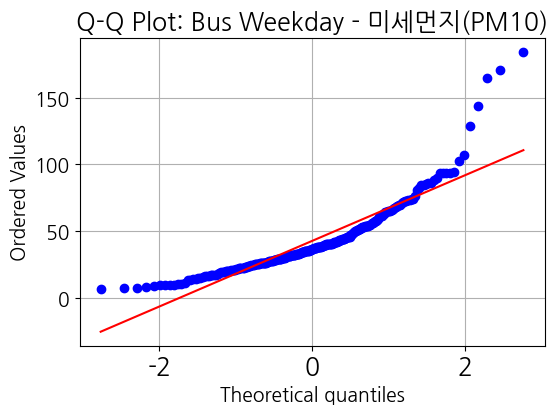

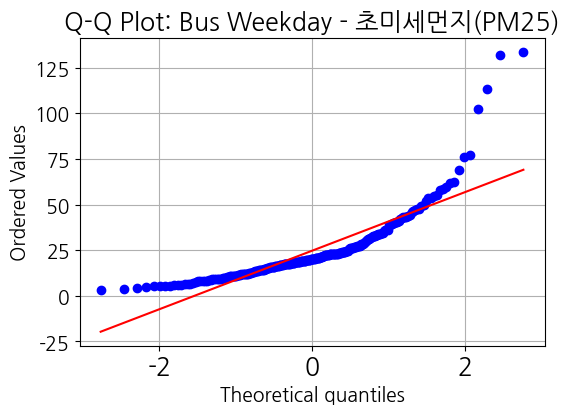

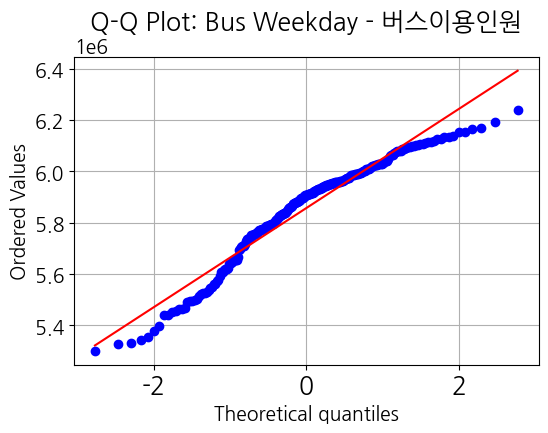

### Bus Saturday ###



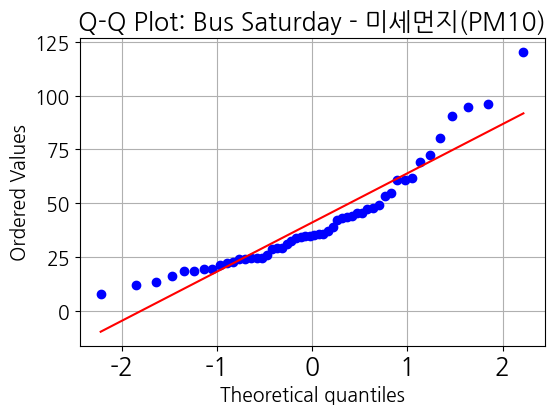

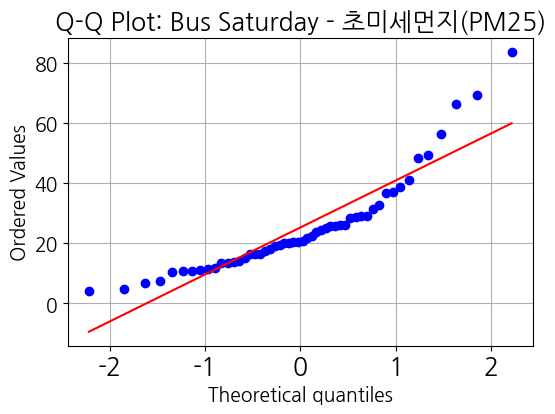

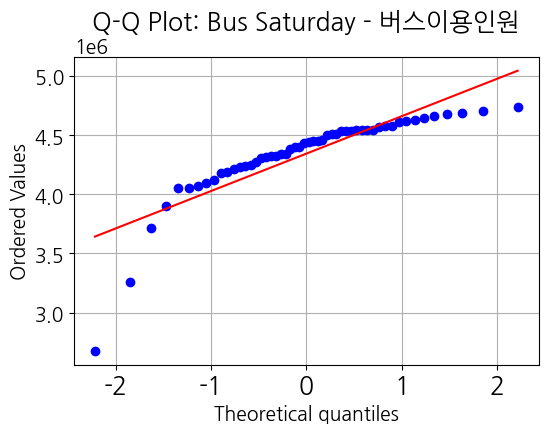

### Bus Sunday ###



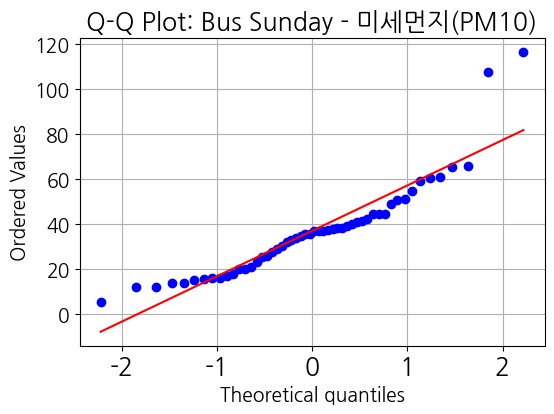

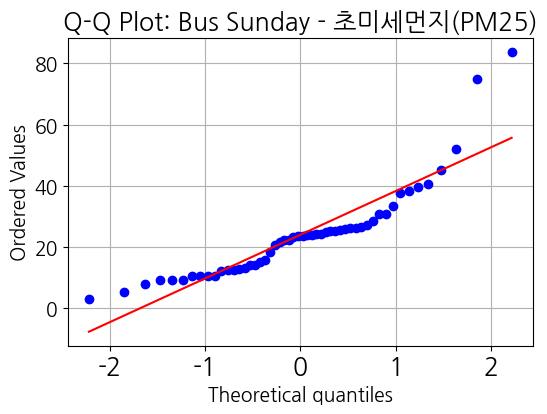

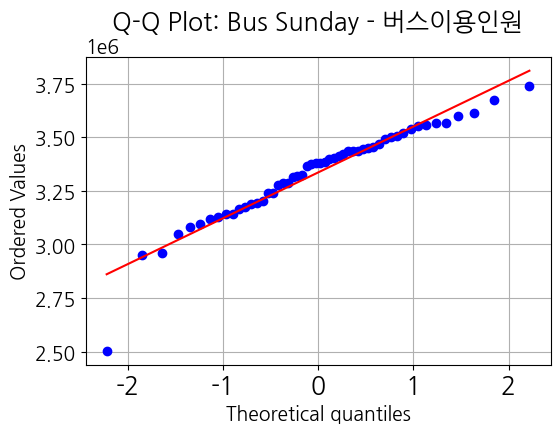

### Subway Weekday ###



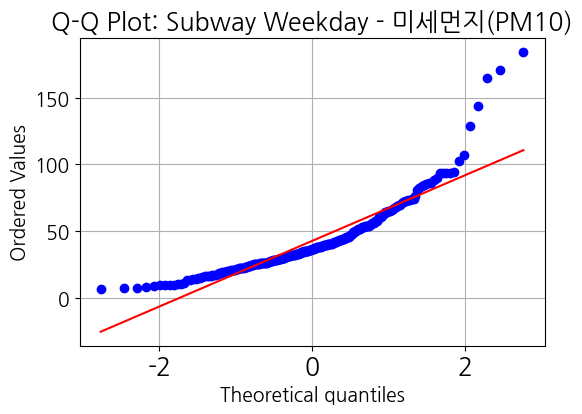

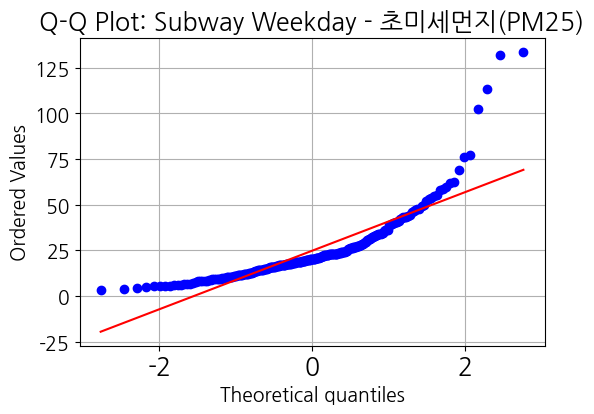

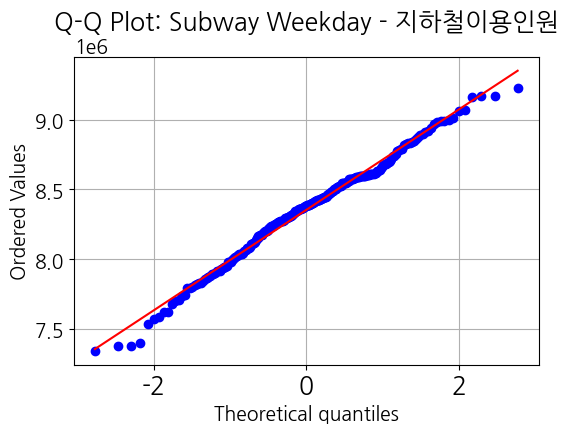

### Subway Saturday ###



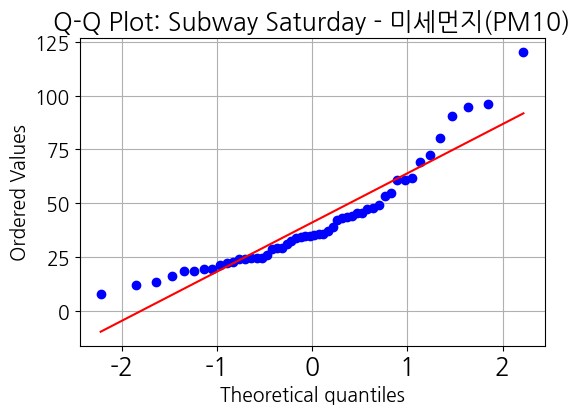

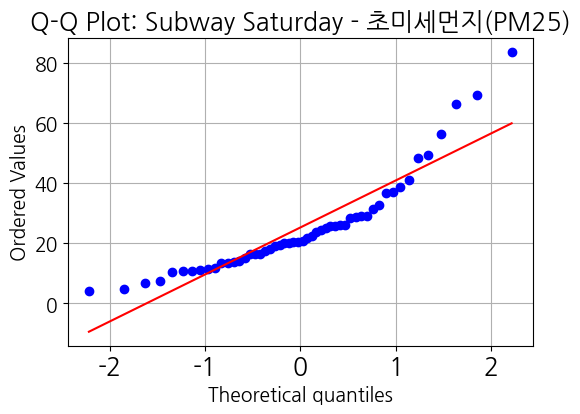

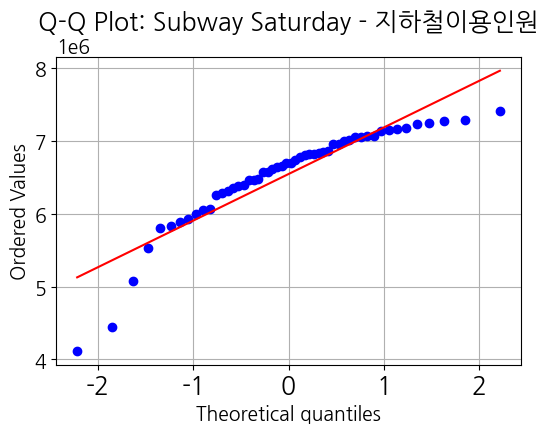

### Subway Sunday ###



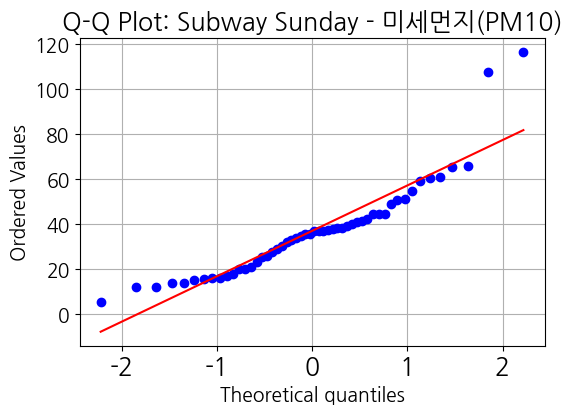

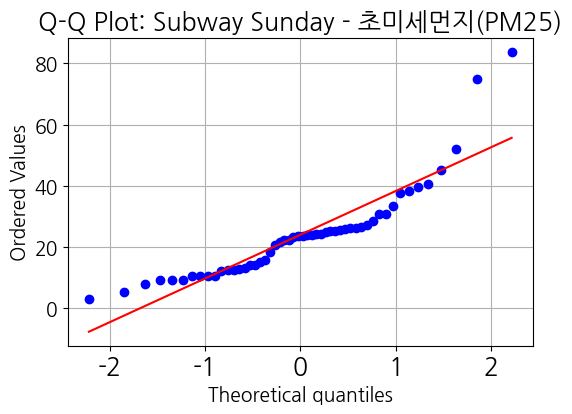

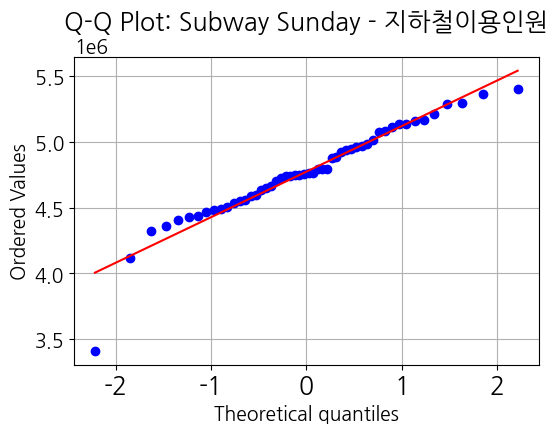

In [30]:
#page7 분포를 확인하기 위한 Q-Q Plot
def qqplot_summary(data, columns, label):
    print(f"### {label} ###\n")
    for column in columns:
        plt.figure(figsize=(6, 4))
        stats.probplot(data[column], dist="norm", plot=plt)
        plt.title(f"Q-Q Plot: {label} - {column}")
        plt.grid(True)
        plt.show()
# 각 데이터셋에 대해 Q-Q Plot 생성
for dataset_name, data in datasets.items():
    qqplot_summary(data, columns_dict[dataset_name], dataset_name)

In [31]:
#page 8
# PM10과 PM2.5에 로그 변환을 적용 -> 데이터의 왜도와 outlier의 영향을 최대한 줄이기 위하여
#로그 변환을 취하면 PM10, PM2.5는 정규분포를 따르지만 대중교통이용인원은 따르지 않는다는 결과
#결론-> 정규분포를 따르지 않는 데이터가 존재하기 때문에 kruskal로 진행한다.

def log_transform_columns(data, columns):
    data_log = data.copy()
    for column in columns:
        data_log[f"log_{column}"] = np.log1p(data_log[column])  # log1p는 log(1+x)를 계산하여 0값 처리 가능
    return data_log

# 로그 변환된 데이터를 저장할 딕셔너리
data_log = {}

# 데이터셋에 로그 변환 적용 (미세먼지와 이용 인원 포함)
columns_to_transform = {
    "Bus Weekday": ["미세먼지(PM10)", "초미세먼지(PM25)", "버스이용인원"],
    "Bus Saturday": ["미세먼지(PM10)", "초미세먼지(PM25)", "버스이용인원"],
    "Bus Sunday": ["미세먼지(PM10)", "초미세먼지(PM25)", "버스이용인원"],
    "Subway Weekday": ["미세먼지(PM10)", "초미세먼지(PM25)", "지하철이용인원"],
    "Subway Saturday": ["미세먼지(PM10)", "초미세먼지(PM25)", "지하철이용인원"],
    "Subway Sunday": ["미세먼지(PM10)", "초미세먼지(PM25)", "지하철이용인원"],
}

for name, dataset in datasets.items():
    data_log[name] = log_transform_columns(dataset, columns_to_transform[name])

# 로그 변환된 데이터에 대한 정규성 검정
def log_normality_test_summary(data, columns, label):
    print(f"### {label} ###\n")
    for column in columns:
        stat, p_value = shapiro(data[f"log_{column}"])
        conclusion = "Normal" if p_value >= 0.05 else "Not Normal"
        print(f"log_{column}의 정규성 검정")
        print(f"Statistic: {stat:.6f}, p-value: {p_value:.6f}, Conclusion: {conclusion}\n")

# 로그 변환된 데이터에 대해 정규성 검정을 수행
for dataset_name, data in data_log.items():
    log_normality_test_summary(data, columns_to_transform[dataset_name], dataset_name)

### Bus Weekday ###

log_미세먼지(PM10)의 정규성 검정
Statistic: 0.990881, p-value: 0.127860, Conclusion: Normal

log_초미세먼지(PM25)의 정규성 검정
Statistic: 0.990483, p-value: 0.108218, Conclusion: Normal

log_버스이용인원의 정규성 검정
Statistic: 0.938869, p-value: 0.000000, Conclusion: Not Normal

### Bus Saturday ###

log_미세먼지(PM10)의 정규성 검정
Statistic: 0.992288, p-value: 0.982219, Conclusion: Normal

log_초미세먼지(PM25)의 정규성 검정
Statistic: 0.987815, p-value: 0.869494, Conclusion: Normal

log_버스이용인원의 정규성 검정
Statistic: 0.680829, p-value: 0.000000, Conclusion: Not Normal

### Bus Sunday ###

log_미세먼지(PM10)의 정규성 검정
Statistic: 0.970161, p-value: 0.214639, Conclusion: Normal

log_초미세먼지(PM25)의 정규성 검정
Statistic: 0.971269, p-value: 0.238998, Conclusion: Normal

log_버스이용인원의 정규성 검정
Statistic: 0.903722, p-value: 0.000493, Conclusion: Not Normal

### Subway Weekday ###

log_미세먼지(PM10)의 정규성 검정
Statistic: 0.990899, p-value: 0.127012, Conclusion: Normal

log_초미세먼지(PM25)의 정규성 검정
Statistic: 0.990722, p-value: 0.117966, Conclusion: Norm


### Q-Q Plot for Bus Weekday ###


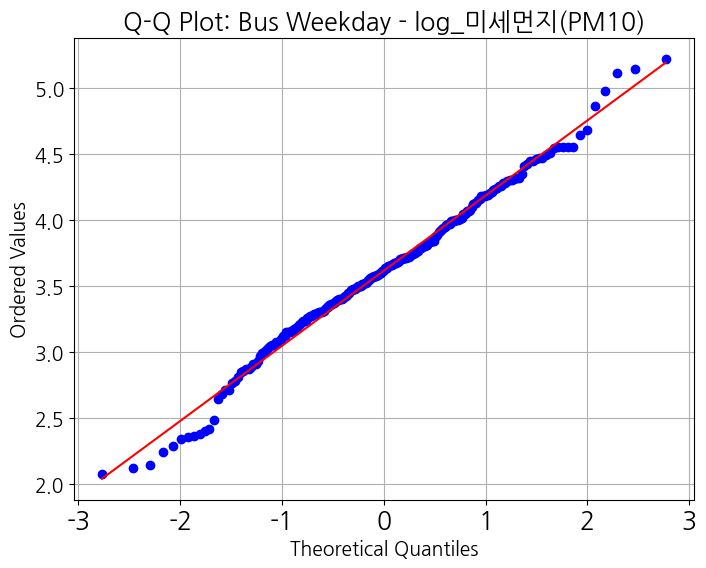

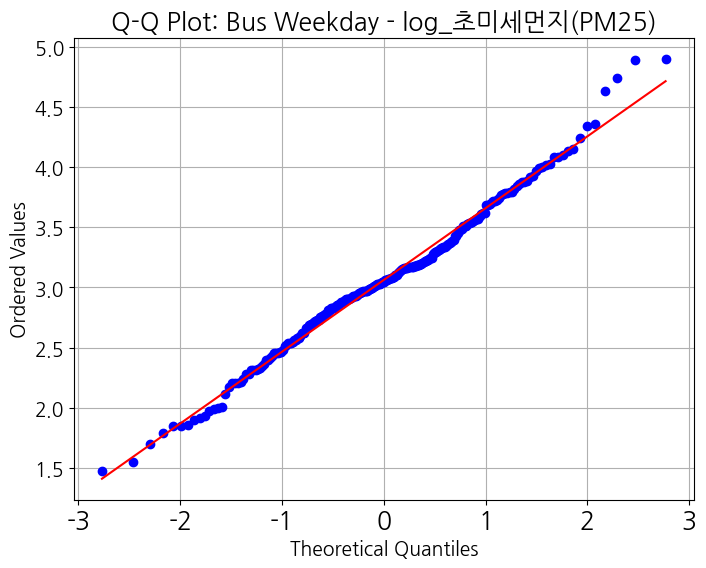

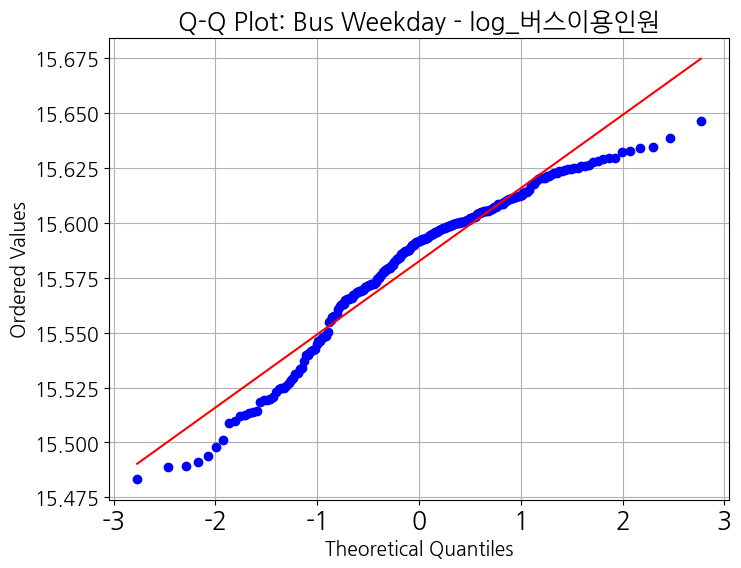


### Q-Q Plot for Bus Saturday ###


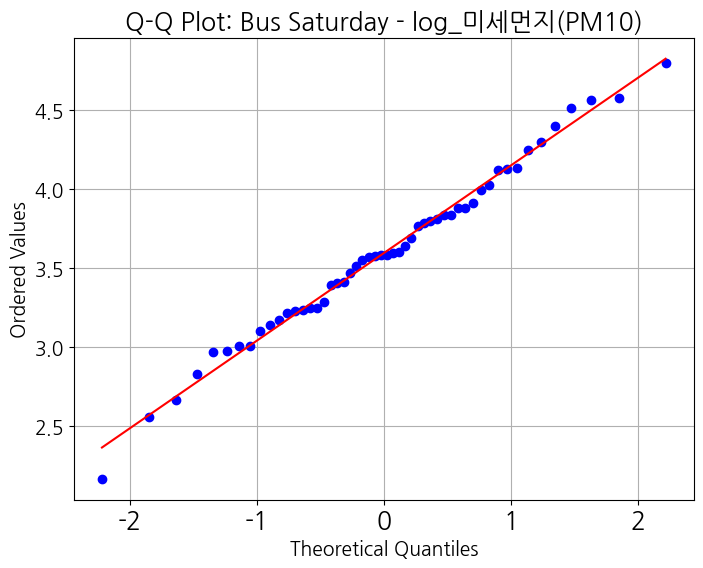

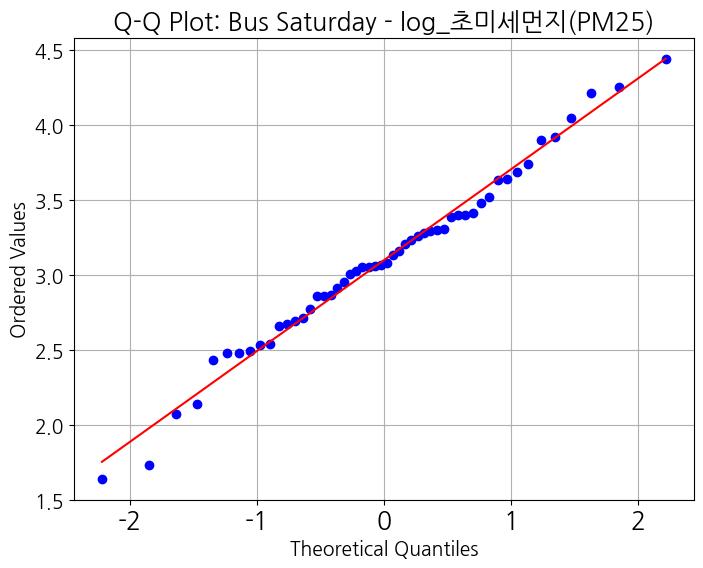

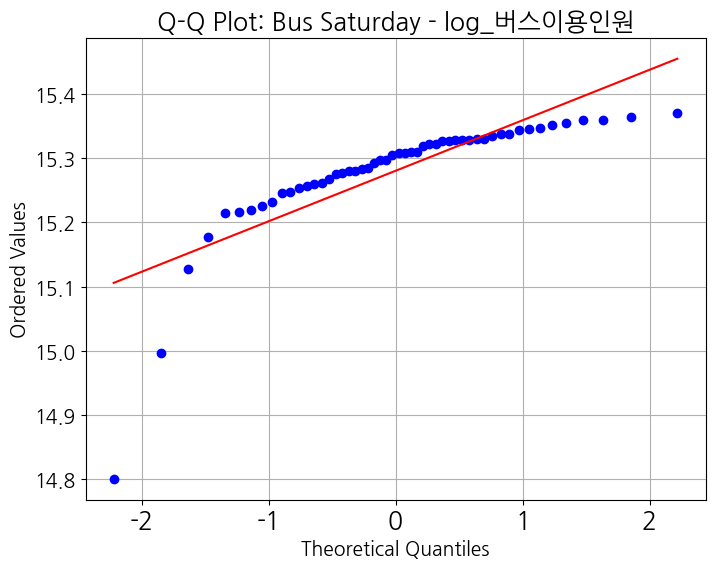


### Q-Q Plot for Bus Sunday ###


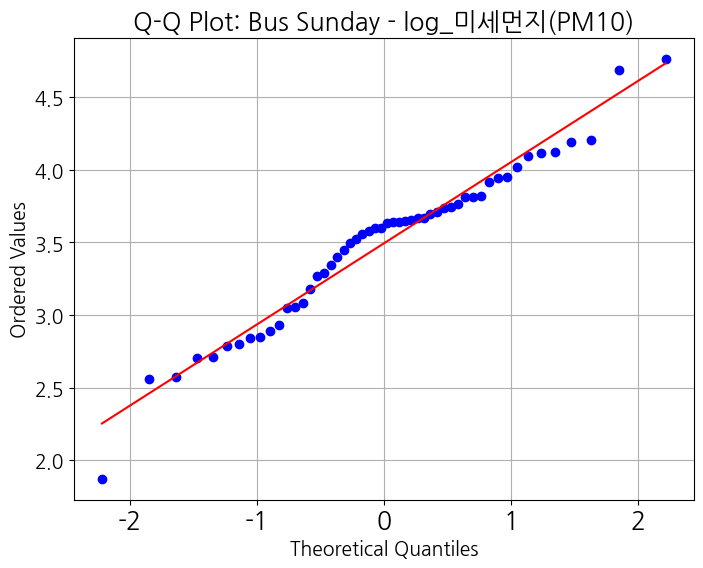

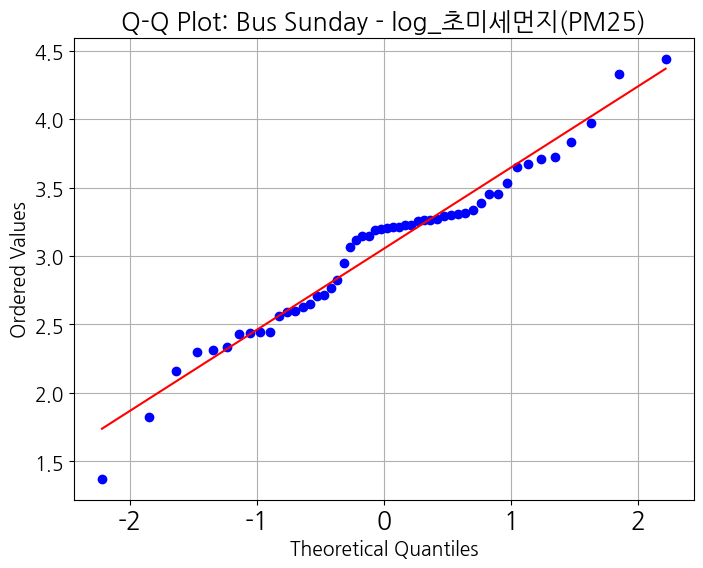

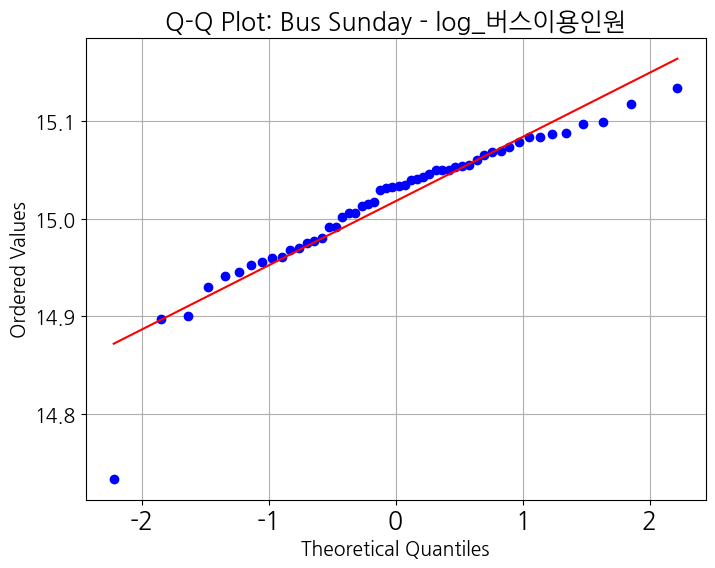


### Q-Q Plot for Subway Weekday ###


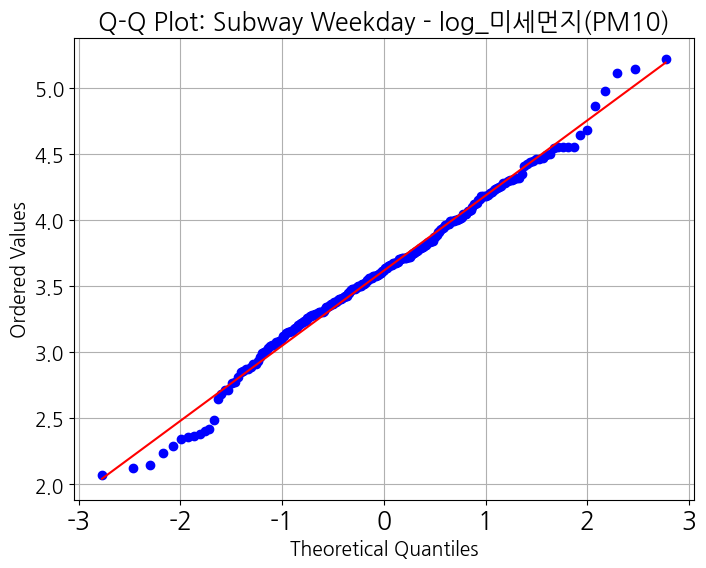

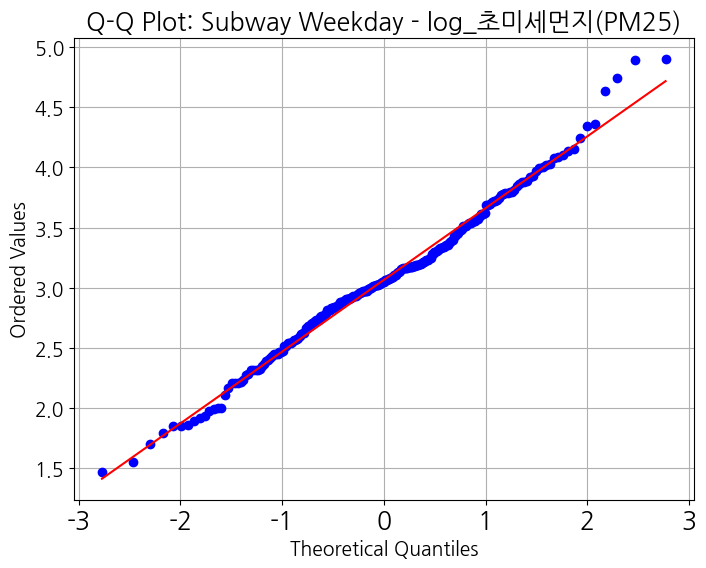

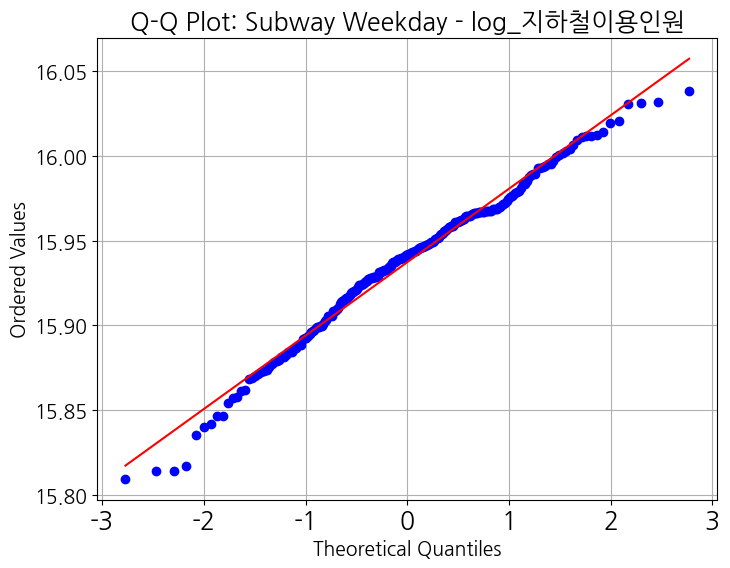


### Q-Q Plot for Subway Saturday ###


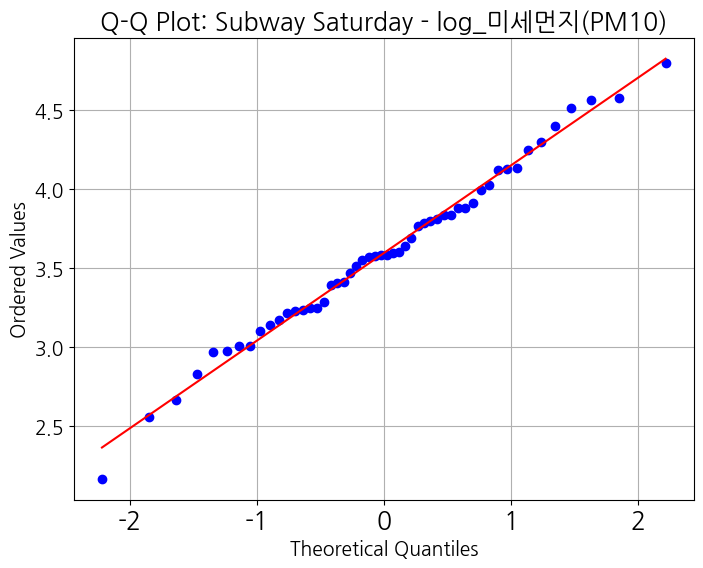

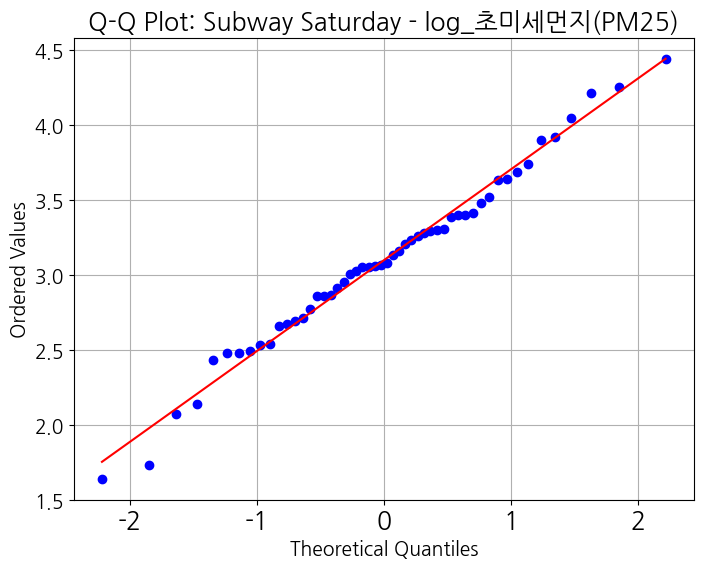

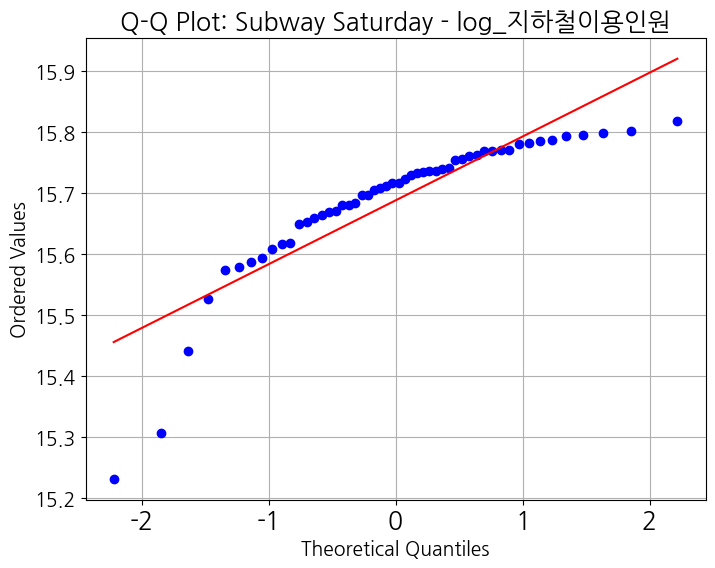


### Q-Q Plot for Subway Sunday ###


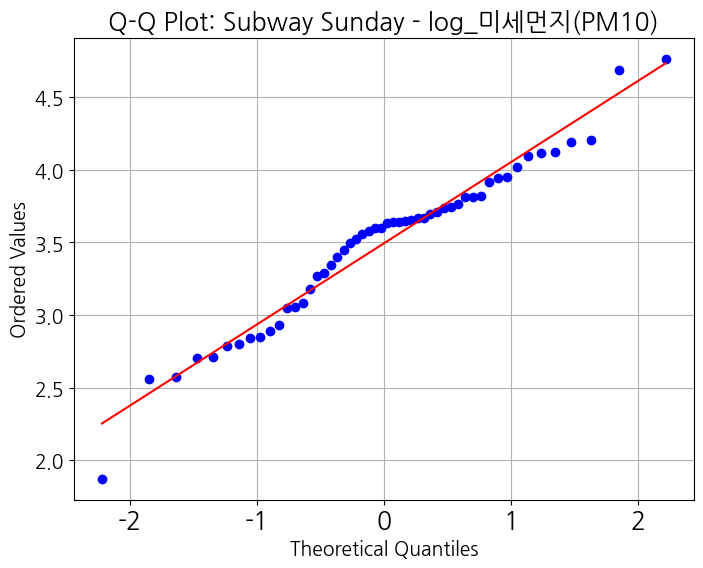

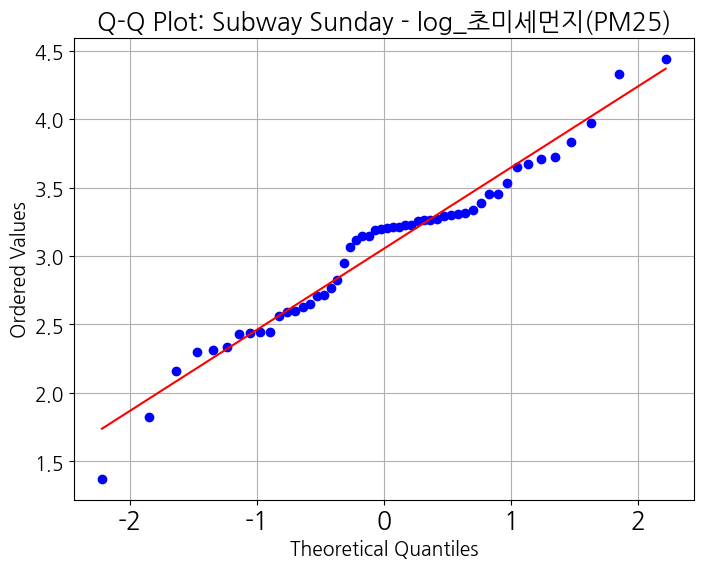

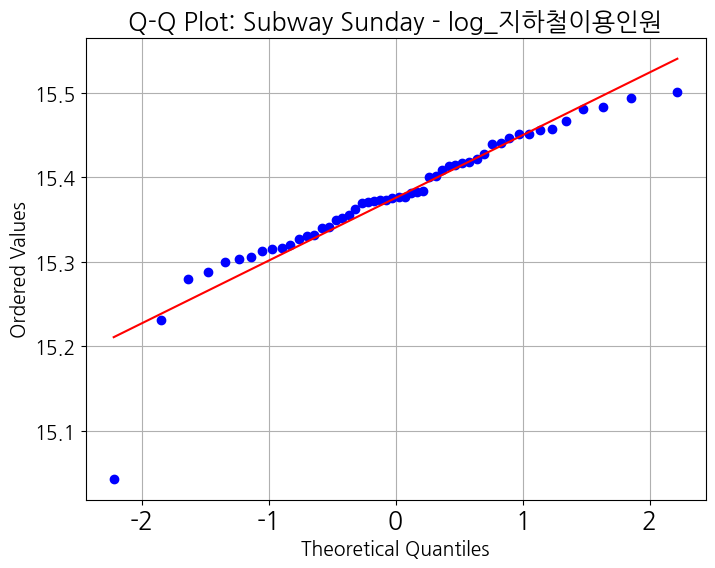

In [32]:
#page9
# 로그변환한 데이터에 대하여 Q-Q Plot
def plot_qq_by_log_columns(data, columns, dataset_name):
    for column in columns:
        plt.figure(figsize=(8, 6))
        stats.probplot(data[f"log_{column}"], dist="norm", plot=plt)
        plt.title(f"Q-Q Plot: {dataset_name} - log_{column}")
        plt.xlabel("Theoretical Quantiles")
        plt.ylabel("Ordered Values")
        plt.grid(True)
        plt.show()

# Q-Q Plot 생성
for dataset_name, dataset in data_log.items():
    print(f"\n### Q-Q Plot for {dataset_name} ###")
    plot_qq_by_log_columns(dataset, columns_to_transform[dataset_name], dataset_name)

In [33]:
# 등급별로 나눈 뒤 정규성 검사 -> 이건 맞는 방향인가?
def test_normality_by_pm_level(dataset, pm_column, value_column):
    grouped_data = dataset.groupby(pm_column)
    results = {}
    for level, group in grouped_data:
        if len(group) >= 3:  # Ensure enough data points for Shapiro-Wilk Test
            stat, p_value = shapiro(group[value_column])
            conclusion = "Normal" if p_value >= 0.05 else "Not Normal"
            results[level] = {"Statistic": stat, "p-value": p_value, "Conclusion": conclusion}
        else:
            results[level] = {"Statistic": None, "p-value": None, "Conclusion": "Insufficient Data"}
    return pd.DataFrame(results).T

#데이터셋
datasets = {
    "Bus Weekday": air_bus_weekday_cleaned,
    "Bus Saturday": air_bus_weekend_cleaned_sat,
    "Bus Sunday": air_bus_weekend_cleaned_sun,
    "Subway Weekday": air_sub_weekday_cleaned,
    "Subway Saturday": air_sub_weekend_cleaned_sat,
    "Subway Sunday": air_sub_weekend_cleaned_sun,
}

# 각 데이터셋에 대한 정규성 검사와 출력
for name, dataset in datasets.items():
    print(f"\n### {name} ###")
    
    # PM10 Normality Test
    pm10_normality_results = test_normality_by_pm_level(
        dataset, "미세먼지 등급", "버스이용인원" if "Bus" in name else "지하철이용인원"
    )
    print("PM10 Normality Test Results")
    print(pm10_normality_results)
    
    # PM2.5 Normality Test
    pm25_normality_results = test_normality_by_pm_level(
        dataset, "초미세먼지 등급", "버스이용인원" if "Bus" in name else "지하철이용인원"
    )
    print("\nPM2.5 Normality Test Results")
    print(pm25_normality_results , "\n")



#데이터들이 not normal이 껴있기 때문에 통일성을 위해 kruskal을 이용



### Bus Weekday ###
PM10 Normality Test Results
     Statistic   p-value  Conclusion
나쁨    0.953546  0.483316      Normal
매우나쁨  0.792694  0.097174      Normal
보통    0.934602  0.000006  Not Normal
좋음    0.954679  0.003518  Not Normal

PM2.5 Normality Test Results
     Statistic   p-value  Conclusion
나쁨    0.971567  0.452455      Normal
매우나쁨  0.782785  0.040915  Not Normal
보통    0.942334  0.000023  Not Normal
좋음    0.934558  0.001341  Not Normal 


### Bus Saturday ###
PM10 Normality Test Results
   Statistic   p-value  Conclusion
나쁨  0.833262  0.147142      Normal
보통  0.899451  0.012995  Not Normal
좋음  0.720641   0.00007  Not Normal

PM2.5 Normality Test Results
     Statistic   p-value         Conclusion
나쁨    0.932461   0.50513             Normal
매우나쁨      None      None  Insufficient Data
보통    0.959118  0.352832             Normal
좋음    0.746957  0.000828         Not Normal 


### Bus Sunday ###
PM10 Normality Test Results
   Statistic   p-value         Conclusion
나쁨      None     


### Bus Weekday ###
PM10 Kruskal-Wallis Test
Statistic = 0.6801915156109999, p-value = 0.8778529165135515


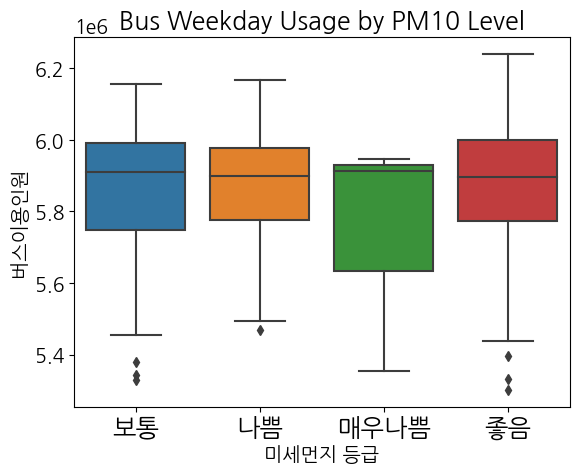



PM2.5 Kruskal-Wallis Test
Statistic = 0.7599300108663556, p-value = 0.8590252373846743


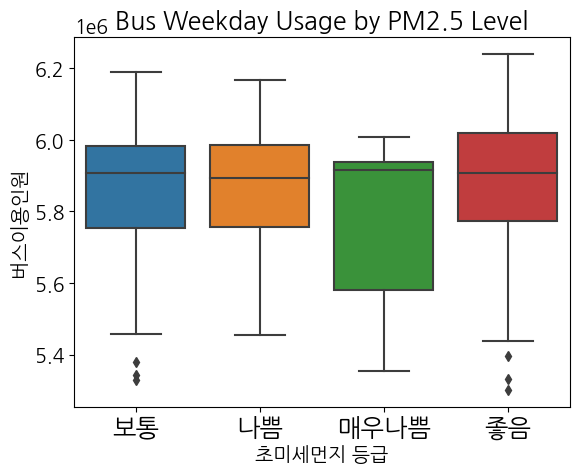


### Bus Saturday ###
PM10 Kruskal-Wallis Test
Statistic = 2.469440412836633, p-value = 0.29091614745267375


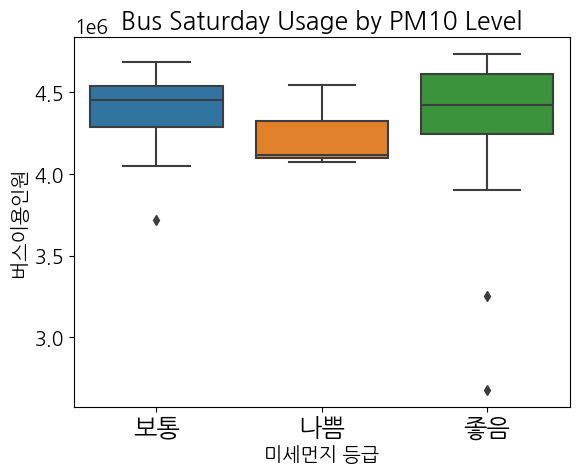



PM2.5 Kruskal-Wallis Test
Statistic = 1.8222544750846623, p-value = 0.6101041286094304


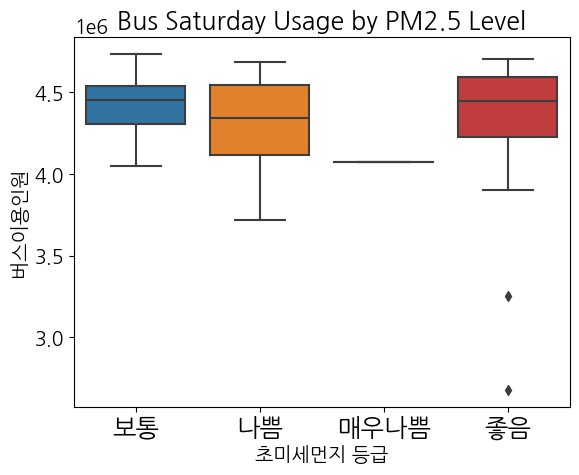


### Bus Sunday ###
PM10 Kruskal-Wallis Test
Statistic = 4.492999376572413, p-value = 0.10576880114149512


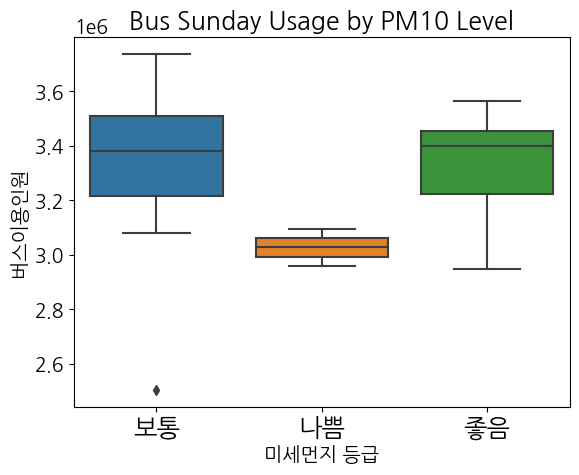



PM2.5 Kruskal-Wallis Test
Statistic = 3.221008309542384, p-value = 0.35878899350767524


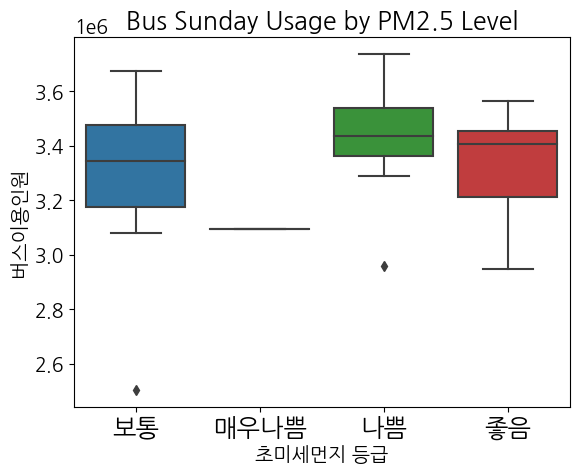


### Subway Weekday ###
PM10 Kruskal-Wallis Test
Statistic = 7.190069572279754, p-value = 0.06608013299631936


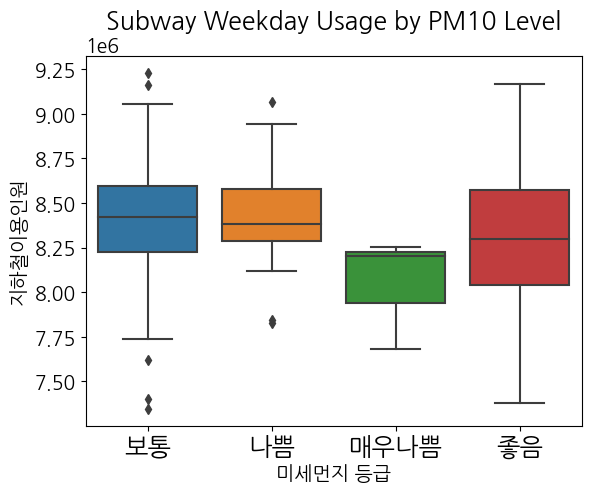



PM2.5 Kruskal-Wallis Test
Statistic = 6.051361161230602, p-value = 0.10913795631637242


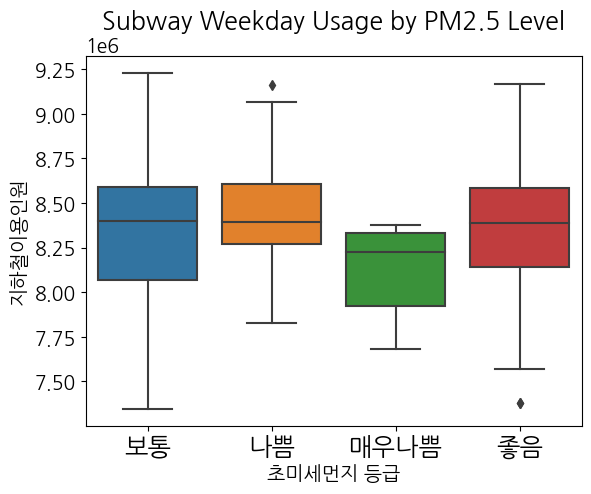


### Subway Saturday ###
PM10 Kruskal-Wallis Test
Statistic = 1.178680857926139, p-value = 0.554693023558607


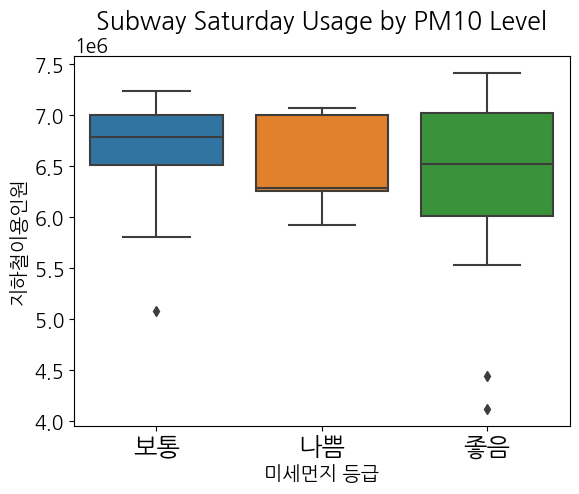



PM2.5 Kruskal-Wallis Test
Statistic = 2.52052894694404, p-value = 0.47159246466497784


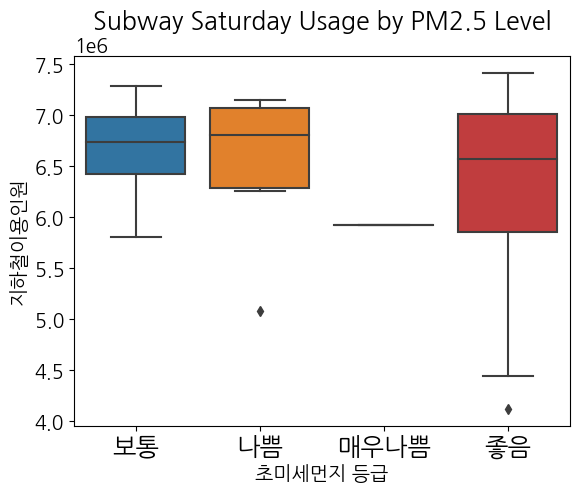


### Subway Sunday ###
PM10 Kruskal-Wallis Test
Statistic = 2.214211438047812, p-value = 0.3305141789744165


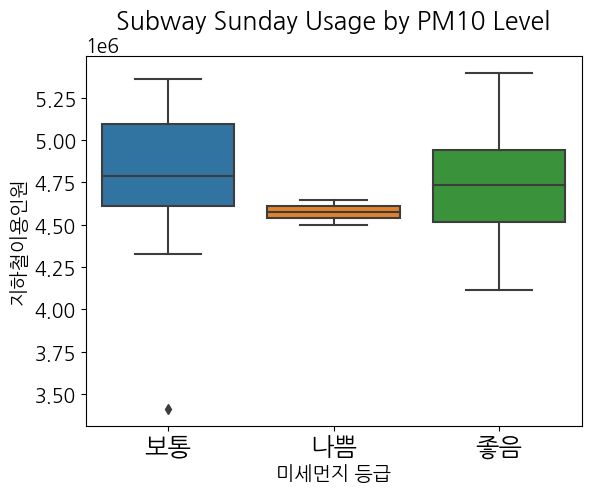



PM2.5 Kruskal-Wallis Test
Statistic = 4.7015688713802035, p-value = 0.19500020631128406


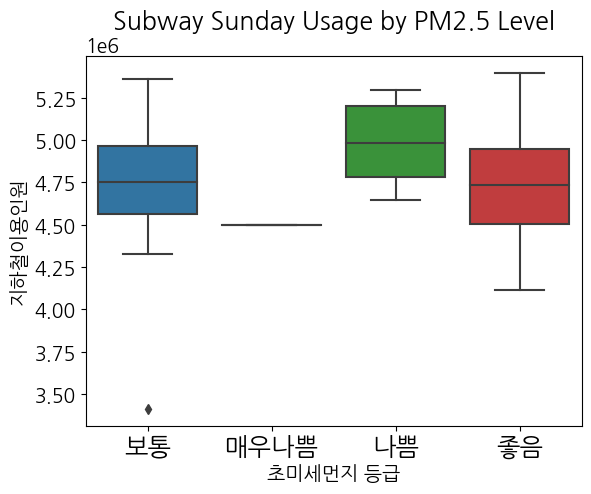

각 데이터의 분포
### Bus Weekday ###
미세먼지 등급별 크기:
미세먼지 등급
나쁨       18
매우나쁨      3
보통      136
좋음       89
dtype: int64
초미세먼지 등급별 크기:
초미세먼지 등급
나쁨       37
매우나쁨      6
보통      134
좋음       69
dtype: int64


### Bus Saturday ###
미세먼지 등급별 크기:
미세먼지 등급
나쁨     5
보통    27
좋음    20
dtype: int64
초미세먼지 등급별 크기:
초미세먼지 등급
나쁨       9
매우나쁨     1
보통      27
좋음      15
dtype: int64


### Bus Sunday ###
미세먼지 등급별 크기:
미세먼지 등급
나쁨     2
보통    31
좋음    19
dtype: int64
초미세먼지 등급별 크기:
초미세먼지 등급
나쁨       7
매우나쁨     1
보통      26
좋음      18
dtype: int64


### Subway Weekday ###
미세먼지 등급별 크기:
미세먼지 등급
나쁨       18
매우나쁨      3
보통      137
좋음       89
dtype: int64
초미세먼지 등급별 크기:
초미세먼지 등급
나쁨       37
매우나쁨      6
보통      135
좋음       69
dtype: int64


### Subway Saturday ###
미세먼지 등급별 크기:
미세먼지 등급
나쁨     5
보통    27
좋음    20
dtype: int64
초미세먼지 등급별 크기:
초미세먼지 등급
나쁨       9
매우나쁨     1
보통      27
좋음      15
dtype: int64


### Subway Sunday ###
미세먼지 등급별 크기:
미세먼지 등급
나쁨     2
보통    31
좋음    19
dtype: int64
초미세먼지 등급별 크기:
초미세먼지 등급
나쁨       7
매

In [34]:
# Page10
#각 데이터들의 kruskal test

for name, dataset in datasets.items():
    print(f"\n### {name} ###")
    
    # PM10 
    pm10_groups = [
        dataset[dataset["미세먼지 등급"] == level]["버스이용인원" if "Bus" in name else "지하철이용인원"]
        for level in dataset["미세먼지 등급"].unique()
    ]
    
    kruskal_stat, kruskal_p = kruskal(*pm10_groups)
    print("PM10 Kruskal-Wallis Test")
    print(f"Statistic = {kruskal_stat}, p-value = {kruskal_p}")
    
    sns.boxplot(data=dataset, x="미세먼지 등급", y="버스이용인원" if "Bus" in name else "지하철이용인원")
    plt.title(f"{name} Usage by PM10 Level")
    plt.show()
    
    print("\n")
    
    # PM2.5 
    pm25_groups = [
        dataset[dataset["초미세먼지 등급"] == level]["버스이용인원" if "Bus" in name else "지하철이용인원"]
        for level in dataset["초미세먼지 등급"].unique()
    ]
    
    kruskal_stat, kruskal_p = kruskal(*pm25_groups)
    print("PM2.5 Kruskal-Wallis Test")
    print(f"Statistic = {kruskal_stat}, p-value = {kruskal_p}")
    
    sns.boxplot(data=dataset, x="초미세먼지 등급", y="버스이용인원" if "Bus" in name else "지하철이용인원")
    plt.title(f"{name} Usage by PM2.5 Level")
    plt.show()

print("각 데이터의 분포")

for name, dataset in datasets.items():
    print(f"### {name} ###")
    print("미세먼지 등급별 크기:")
    print(dataset.groupby("미세먼지 등급").size())
    print("초미세먼지 등급별 크기:")
    print(dataset.groupby("초미세먼지 등급").size())
    print("\n")
#결과를 보면 Insufficient Data가 존재한다. 이는 데이터의 표본이 3개 미만인 아주 적은 경우라 검사가 진행되지 않는다.
#매우나쁨은 없거나 표본이 매우 적은 것을 볼 수 있다.
#kruskal의 결과 모든 pvalue가 0.05를 넘는다.

from matplotlib import rc

# 한글 폰트 설정 (맑은 고딕)
rc('font', family='Malgun Gothic')

# 음수 기호가 깨지는 경우 대비
plt.rcParams['axes.unicode_minus'] = False



In [35]:
# Page11
#각 데이터들에 대하여 매우 나쁨을 제거한 경우, 매우나쁨을 나쁨 컬럼과 합친 경우에 대하여 kruskal과 spearman 진행. 이때 이 페이지의 기준은 미세먼지의 등급(불연속) 이다.
def analyze_pm_levels(dataset, pm_column, value_column, remove_level=None, combine_levels=False):
    results = {}
    
    # 매우나쁨 데이터를 제거할지 말지
    if remove_level:
        filtered_data = dataset[dataset[pm_column] != remove_level]
    else:
        filtered_data = dataset.copy()
    
    # 매우나쁨과 나쁨을 합칠지 말지
    pm_column_combined = pm_column
    if combine_levels:
        filtered_data[f"{pm_column} (결합)"] = filtered_data[pm_column].apply(
            lambda row: "나쁨 이상" if row in ["나쁨", "매우나쁨"] else row
        )
        pm_column_combined = f"{pm_column} (결합)"
    
    # 필터된 데이터에 대하여 Kruskal H test
    pm_groups = [
        filtered_data[filtered_data[pm_column_combined] == level][value_column]
        for level in filtered_data[pm_column_combined].unique()
    ]
    kruskal_stat, kruskal_p = kruskal(*pm_groups)
    results["Kruskal-Wallis"] = {"Statistic": kruskal_stat, "p-value": kruskal_p}
    
    # Step 4: Spearman Correlation 분석
    spearman_stat, spearman_p = spearmanr(filtered_data[pm_column_combined], filtered_data[value_column])
    results["Spearman"] = {"Correlation": spearman_stat, "p-value": spearman_p}
    
    return results


datasets = {
    "Bus Weekday": {"data": air_bus_weekday_cleaned, "value_column": "버스이용인원"},
    "Bus Saturday": {"data": air_bus_weekend_cleaned_sat, "value_column": "버스이용인원"},
    "Bus Sunday": {"data": air_bus_weekend_cleaned_sun, "value_column": "버스이용인원"},
    "Subway Weekday": {"data": air_sub_weekday_cleaned, "value_column": "지하철이용인원"},
    "Subway Saturday": {"data": air_sub_weekend_cleaned_sat, "value_column": "지하철이용인원"},
    "Subway Sunday": {"data": air_sub_weekend_cleaned_sun, "value_column": "지하철이용인원"},
}

# PM10과 PM2.5일때의 분석
print("spearman의 기준이 미세먼지의 등급일 때")
for dataset_name, config in datasets.items():
    print(f"### {dataset_name} ###\n")
    
    # PM10
    print("PM10 Analysis - Removing '매우나쁨'")
    pm10_remove_results = analyze_pm_levels(
        config["data"], "미세먼지 등급", config["value_column"], remove_level="매우나쁨", combine_levels=False
    )
    print(f"Kruskal-Wallis: {pm10_remove_results['Kruskal-Wallis']}")
    print(f"Spearman: {pm10_remove_results['Spearman']}\n")
    
    print("PM10 Analysis - Combining '나쁨' and '매우나쁨'")
    pm10_combine_results = analyze_pm_levels(
        config["data"], "미세먼지 등급", config["value_column"], remove_level=None, combine_levels=True
    )
    print(f"Kruskal-Wallis: {pm10_combine_results['Kruskal-Wallis']}")
    print(f"Spearman: {pm10_combine_results['Spearman']}\n")
    
    # PM2.5
    print("PM2.5 Analysis - Removing '매우나쁨'")
    pm25_remove_results = analyze_pm_levels(
        config["data"], "초미세먼지 등급", config["value_column"], remove_level="매우나쁨", combine_levels=False
    )
    print(f"Kruskal-Wallis: {pm25_remove_results['Kruskal-Wallis']}")
    print(f"Spearman: {pm25_remove_results['Spearman']}\n")
    
    print("PM2.5 Analysis - Combining '나쁨' and '매우나쁨'")
    pm25_combine_results = analyze_pm_levels(
        config["data"], "초미세먼지 등급", config["value_column"], remove_level=None, combine_levels=True
    )
    print(f"Kruskal-Wallis: {pm25_combine_results['Kruskal-Wallis']}")
    print(f"Spearman: {pm25_combine_results['Spearman']}\n")

#spearman의 기준이 미세먼지의 등급일 때 모든 pvlaue가 0.05를 넘는다..

spearman의 기준이 미세먼지의 등급일 때
### Bus Weekday ###

PM10 Analysis - Removing '매우나쁨'
Kruskal-Wallis: {'Statistic': 0.14505708187937216, 'p-value': 0.9300392020887043}
Spearman: {'Correlation': 0.00014295780698479955, 'p-value': 0.9982310905791134}

PM10 Analysis - Combining '나쁨' and '매우나쁨'
Kruskal-Wallis: {'Statistic': 0.3642029826777389, 'p-value': 0.8335167413927199}
Spearman: {'Correlation': 0.009157105130809312, 'p-value': 0.8863730514316428}

PM2.5 Analysis - Removing '매우나쁨'
Kruskal-Wallis: {'Statistic': 0.27077816215603434, 'p-value': 0.8733760314839999}
Spearman: {'Correlation': 0.013498412567285033, 'p-value': 0.8352022486953018}

PM2.5 Analysis - Combining '나쁨' and '매우나쁨'
Kruskal-Wallis: {'Statistic': 0.23106859153733694, 'p-value': 0.890890017955175}
Spearman: {'Correlation': 0.023518647508731793, 'p-value': 0.7135835223836028}

### Bus Saturday ###

PM10 Analysis - Removing '매우나쁨'
Kruskal-Wallis: {'Statistic': 2.469440412836633, 'p-value': 0.29091614745267375}
Spearman: {'Correlat

In [36]:
# Page 12
#각 데이터들에 대하여 매우 나쁨을 제거한 경우, 매우나쁨을 나쁨 컬럼과 합친 경우에 대하여 kruskal과 spearman 진행. 이때 이 페이지의 기준은 미세먼지의 농도(연속) 이다.
def analyze_pm_levels(dataset, pm_column, value_column, remove_level=None, combine_levels=False):
    results = {}
    
 
    filtered_data = dataset[dataset[pm_column] != remove_level] if remove_level else dataset.copy()
    
    pm_column_combined = pm_column 
    if combine_levels:
        filtered_data[f"{pm_column}_combined"] = filtered_data[pm_column].apply(
            lambda x: "나쁨 이상" if x in ["나쁨", "매우나쁨"] else x
        )
        pm_column_combined = f"{pm_column}_combined"
    
    pm_groups = [
        filtered_data[filtered_data[pm_column_combined] == level][value_column]
        for level in filtered_data[pm_column_combined].unique()
    ]
    kruskal_stat, kruskal_p = kruskal(*pm_groups)
    results["Kruskal-Wallis"] = {"Statistic": kruskal_stat, "p-value": kruskal_p}   
    return results


print("spearman 기준이 미세먼지의 농도(연속)인 경우")
for dataset_name, config in datasets.items():
    print(f"### {dataset_name} ###\n")
    
    # PM10
    print("PM10 Analysis - Removing '매우나쁨'")
    pm10_remove_results = analyze_pm_levels(
        config["data"], "미세먼지 등급", config["value_column"], remove_level="매우나쁨", combine_levels=False
    )
    spearman_pm10_remove = spearmanr(config["data"]["미세먼지(PM10)"], config["data"][config["value_column"]])
    print(f"Kruskal-Wallis: {pm10_remove_results['Kruskal-Wallis']}")
    print(f"Spearman (PM10 - Numeric): {spearman_pm10_remove}\n")
    
    print("PM10 Analysis - Combining '나쁨' and '매우나쁨'")
    pm10_combine_results = analyze_pm_levels(
        config["data"], "미세먼지 등급", config["value_column"], remove_level=None, combine_levels=True
    )
    spearman_pm10_combine = spearmanr(config["data"]["미세먼지(PM10)"], config["data"][config["value_column"]])
    print(f"Kruskal-Wallis: {pm10_combine_results['Kruskal-Wallis']}")
    print(f"Spearman (PM10 - Numeric): {spearman_pm10_combine}\n")
    
    # PM2.5
    print("PM2.5 Analysis - Removing '매우나쁨'")
    pm25_remove_results = analyze_pm_levels(
        config["data"], "초미세먼지 등급", config["value_column"], remove_level="매우나쁨", combine_levels=False
    )
    spearman_pm25_remove = spearmanr(config["data"]["초미세먼지(PM25)"], config["data"][config["value_column"]])
    print(f"Kruskal-Wallis: {pm25_remove_results['Kruskal-Wallis']}")
    print(f"Spearman (PM2.5 - Numeric): {spearman_pm25_remove}\n")
    
    print("PM2.5 Analysis - Combining '나쁨' and '매우나쁨'")
    pm25_combine_results = analyze_pm_levels(
        config["data"], "초미세먼지 등급", config["value_column"], remove_level=None, combine_levels=True
    )
    spearman_pm25_combine = spearmanr(config["data"]["초미세먼지(PM25)"], config["data"][config["value_column"]])
    print(f"Kruskal-Wallis: {pm25_combine_results['Kruskal-Wallis']}")
    print(f"Spearman (PM2.5 - Numeric): {spearman_pm25_combine}\n")




#왜 데이터 제거 후에도 spearman의 cor, pvalue가 같은가?
# 제거 전후의 데이터 크기 확인
# 특정 등급 제거 
remove_level = "매우나쁨" 
filtered_data = air_bus_weekday_cleaned[air_bus_weekday_cleaned["초미세먼지 등급"] != remove_level]

# 데이터 크기 비교
print(f"원본 데이터 크기: {len(air_bus_weekday_cleaned)}")
print(f"필터링된 데이터 크기: {len(filtered_data)}")

# Spearman 상관계수 계산
print("Spearman 상관계수 비교 (원본 vs 필터링):")

# 원본 데이터에 대한 Spearman 상관계수
stat_original, p_value_original = spearmanr(
    air_bus_weekday_cleaned["초미세먼지(PM25)"], air_bus_weekday_cleaned["버스이용인원"]
)
print(f"원본 데이터 Spearman: Statistic = {stat_original}, p-value = {p_value_original}")

# 필터링된 데이터에 대한 Spearman 상관계수
stat_filtered, p_value_filtered = spearmanr(
    filtered_data["초미세먼지(PM25)"], filtered_data["버스이용인원"]
)
print(f"필터링된 데이터 Spearman: Statistic = {stat_filtered}, p-value = {p_value_filtered}")

#데이더 6개가 제거되어도 전후 결과를 보니 영향이 매우 미비하다.
#기준이 미세먼지의 농도(연속)인 경우에도 모든 pvlaue가 0.05를 넘는다

spearman 기준이 미세먼지의 농도(연속)인 경우
### Bus Weekday ###

PM10 Analysis - Removing '매우나쁨'
Kruskal-Wallis: {'Statistic': 0.14505708187937216, 'p-value': 0.9300392020887043}
Spearman (PM10 - Numeric): SignificanceResult(statistic=-0.003668526725017252, pvalue=0.9543494514708295)

PM10 Analysis - Combining '나쁨' and '매우나쁨'
Kruskal-Wallis: {'Statistic': 0.3642029826777389, 'p-value': 0.8335167413927199}
Spearman (PM10 - Numeric): SignificanceResult(statistic=-0.003668526725017252, pvalue=0.9543494514708295)

PM2.5 Analysis - Removing '매우나쁨'
Kruskal-Wallis: {'Statistic': 0.27077816215603434, 'p-value': 0.8733760314839999}
Spearman (PM2.5 - Numeric): SignificanceResult(statistic=-0.032213235141395055, pvalue=0.6151034546782201)

PM2.5 Analysis - Combining '나쁨' and '매우나쁨'
Kruskal-Wallis: {'Statistic': 0.23106859153733694, 'p-value': 0.890890017955175}
Spearman (PM2.5 - Numeric): SignificanceResult(statistic=-0.032213235141395055, pvalue=0.6151034546782201)

### Bus Saturday ###

PM10 Analysis - Remov

In [38]:
#page13
# 대중교통 이용인원과 PM10, PM2.5 간의 Spearman 상관 분석

datasets = {
    "Bus Weekday": air_bus_weekday_cleaned,
    "Bus Saturday": air_bus_weekend_cleaned_sat,
    "Bus Sunday": air_bus_weekend_cleaned_sun,
    "Subway Weekday": air_sub_weekday_cleaned,
    "Subway Saturday": air_sub_weekend_cleaned_sat,
    "Subway Sunday": air_sub_weekend_cleaned_sun,
}




for name, dataset in datasets.items():
    print(f"### {name} ###")
    
    # PM10과 대중교통 이용인원 간의 Spearman 상관 분석
    stat_pm10, p_value_pm10 = stats.spearmanr(dataset["미세먼지(PM10)"], dataset["버스이용인원"] if "Bus" in name else dataset["지하철이용인원"])
    print(f"Spearman PM10와 대중교통 이용인원: Statistic = {stat_pm10}, p-value = {p_value_pm10}")
    
    # PM2.5와 대중교통 이용인원 간의 Spearman 상관 분석
    stat_pm25, p_value_pm25 = stats.spearmanr(dataset["초미세먼지(PM25)"], dataset["버스이용인원"] if "Bus" in name else dataset["지하철이용인원"])
    print(f"Spearman PM2.5와 대중교통 이용인원: Statistic = {stat_pm25}, p-value = {p_value_pm25}")


### Bus Weekday ###
Spearman PM10와 대중교통 이용인원: Statistic = -0.003668526725017252, p-value = 0.9543494514708295
Spearman PM2.5와 대중교통 이용인원: Statistic = -0.032213235141395055, p-value = 0.6151034546782201
### Bus Saturday ###
Spearman PM10와 대중교통 이용인원: Statistic = -0.09306098057657593, p-value = 0.511704821243087
Spearman PM2.5와 대중교통 이용인원: Statistic = -0.10449927431059507, p-value = 0.46096492465598016
### Bus Sunday ###
Spearman PM10와 대중교통 이용인원: Statistic = 0.027320654848169076, p-value = 0.8475395741432759
Spearman PM2.5와 대중교통 이용인원: Statistic = -0.014343649959708053, p-value = 0.9196105558808496
### Subway Weekday ###
Spearman PM10와 대중교통 이용인원: Statistic = 0.1245939654859635, p-value = 0.050483679684015056
Spearman PM2.5와 대중교통 이용인원: Statistic = 0.04899316058948664, p-value = 0.4433535040268798
### Subway Saturday ###
Spearman PM10와 대중교통 이용인원: Statistic = 0.10748970141826523, p-value = 0.4481646578058275
Spearman PM2.5와 대중교통 이용인원: Statistic = 0.072142064372919, p-value = 0.6112845091259604


# Page14 가설검정 결과

### 1. 가설 정의
귀무가설 (H₀): 미세먼지(PM10, PM2.5)의 등급이나 농도는 대중교통(버스, 지하철) 이용률에 유의미한 영향을 미치지 않는다.   <br>
대립가설 (H₁): 미세먼지(PM10, PM2.5)의 등급이나 농도는 대중교통(버스, 지하철) 이용률에 유의미한 영향을 미친다.

### 2. 정규성 검정
대부분의 데이터가 정규성을 따르지 않는다.<br>
로그변환을 적용하면 PM10, PM2.5는 정규분포를 따르지만 대중교통 이용인원은 따르지 않는다 <br>
따라서 Kruskal 검정을 진행한다.

### 3. Kruskal-Wallis H Test 결과
모든 데이터셋에서 PM10과 PM2.5 등급별 Kruskal-Wallis 검정의 p-value가 0.05 이상으로 나타난다-> 미세먼지 등급에 따른 대중교통 이용량의 차이가 유의미하지 않다<br>
매우 나쁨의 데이터가 매우 적기에 예외처리를 하면 결과가 다른가 궁금하여 매우 나쁨 제거, 나쁨+매우나쁨 결합후 Test-> 데이터를 재조정한 경우에도  <br>
p-value는 여전히 0.05 이상으로 매우 나쁨 등급의 데이터가 전체적인 결과에 영향을 미치지 않는다는 결과가 나왔다.

### 4. Spearman Correlation 결과
1. 농도(연속형 변수)기반 -> PM10과 PM2.5 농도 모두 대중교통 이용량과의 상관관계가 약하거나 없는 것으로 나타난다 pvalue 또한 모두 0.05를 넘는다. <br>
    그나마 Subway Weekday 데이터에서 PM10의 p-value가 0.05에 근접했으나, 상관계수(Correlation = 0.124)는 매우 약한 상관관계를 나타낸다. <br>
2. 등급(불연속형 변수) 기반-> PM10과 PM2.5 등급(불연속)도 대중교통 이용량과 유의미한 상관관계를 보이지 않는다. pvalue는 모두 0.05를 넘는다.

### 5. 결론
PM10과 PM2.5의 등급(좋음, 보통, 나쁨, 매우나쁨)에 따른 대중교통 이용량의 유의미한 차이는 발견되지 않았다.<br>
미세먼지 농도와 대중교통 이용량 간 상관관계또한 유의미한 결과가 나오지 않았다.


In [40]:
#Regression

warnings.filterwarnings("ignore")
## 주말의 총이용인원(버스 + 지하철) 구하기 
# 날짜를 기준으로 병합
merged_data_weekend = pd.merge(air_bus_weekend_cleaned, air_sub_weekend_cleaned, on='날짜', how='inner')

# 불필요한 중복 열 제거
merged_data_weekend = merged_data_weekend.drop(columns=['요일_y', '요일구분_y', '미세먼지(PM10)_y', '초미세먼지(PM25)_y', '미세먼지 등급_y', '초미세먼지 등급_y'])

# rename
merged_data_weekend.rename(columns={
    '요일_x': '요일',
    '요일구분_x': '요일구분',
    '초미세먼지(PM25)_x': '초미세먼지_PM25',
    '미세먼지(PM10)_x': '미세먼지_PM10',
    '미세먼지 등급_x': '미세먼지 등급',
    '초미세먼지 등급_x': '초미세먼지 등급',
}, inplace=True)

merged_data_weekend

,날짜,미세먼지_PM10,초미세먼지_PM25,미세먼지 등급,초미세먼지 등급,버스이용인원,요일,요일구분,지하철이용인원
0,2019-01-05,54.85,31.35,보통,보통,4050127,토요일,주말,6062294
1,2019-01-06,49.10,23.70,보통,보통,3118038,일요일,주말,4408718
2,2019-01-12,96.20,69.50,나쁨,나쁨,4119460,토요일,주말,6282189
3,2019-01-13,116.50,83.80,나쁨,매우나쁨,3095130,일요일,주말,4501053
4,2019-01-19,94.80,66.45,나쁨,나쁨,4096367,토요일,주말,6259796
...,...,...,...,...,...,...,...,...,...
99,2019-12-15,36.95,25.00,보통,보통,3380539,일요일,주말,4968511
100,2019-12-21,35.45,24.30,보통,보통,4532238,토요일,주말,7139298
101,2019-12-22,60.40,45.20,보통,나쁨,3517719,일요일,주말,5108439
102,2019-12-28,43.65,25.85,보통,보통,4270697,토요일,주말,6567343


In [44]:
# 병합 후 총 대중교통 이용량 계산
merged_data_weekend['총이용인원'] = merged_data_weekend['버스이용인원'] + merged_data_weekend['지하철이용인원']
merged_data_weekend

,날짜,미세먼지_PM10,초미세먼지_PM25,미세먼지 등급,초미세먼지 등급,버스이용인원,요일,요일구분,지하철이용인원,총이용인원
0,2019-01-05,54.85,31.35,보통,보통,4050127,토요일,주말,6062294,10112421
1,2019-01-06,49.10,23.70,보통,보통,3118038,일요일,주말,4408718,7526756
2,2019-01-12,96.20,69.50,나쁨,나쁨,4119460,토요일,주말,6282189,10401649
3,2019-01-13,116.50,83.80,나쁨,매우나쁨,3095130,일요일,주말,4501053,7596183
4,2019-01-19,94.80,66.45,나쁨,나쁨,4096367,토요일,주말,6259796,10356163
...,...,...,...,...,...,...,...,...,...,...
99,2019-12-15,36.95,25.00,보통,보통,3380539,일요일,주말,4968511,8349050
100,2019-12-21,35.45,24.30,보통,보통,4532238,토요일,주말,7139298,11671536
101,2019-12-22,60.40,45.20,보통,나쁨,3517719,일요일,주말,5108439,8626158
102,2019-12-28,43.65,25.85,보통,보통,4270697,토요일,주말,6567343,10838040


In [45]:
# 상관계수 계산
merged_data_weekend[['미세먼지_PM10', '초미세먼지_PM25', '지하철이용인원', '버스이용인원', '총이용인원']].corr()

,미세먼지_PM10,초미세먼지_PM25,지하철이용인원,버스이용인원,총이용인원
미세먼지_PM10,1.000000,0.962617,0.121908,0.059426,0.099774
초미세먼지_PM25,0.962617,1.000000,0.062554,0.008534,0.043240
지하철이용인원,0.121908,0.062554,1.000000,0.982254,0.997689
버스이용인원,0.059426,0.008534,0.982254,1.000000,0.992728
총이용인원,0.099774,0.043240,0.997689,0.992728,1.000000


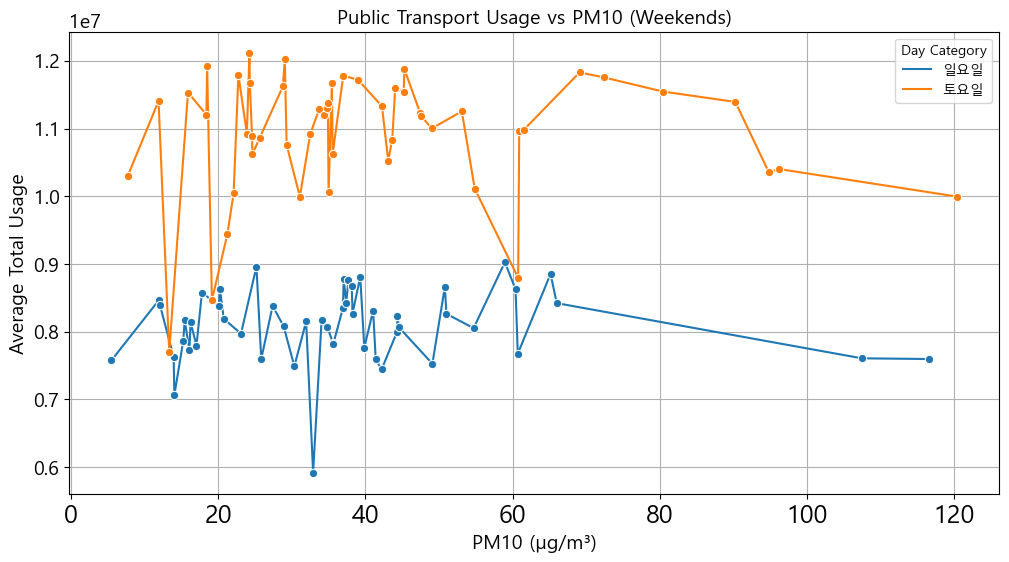

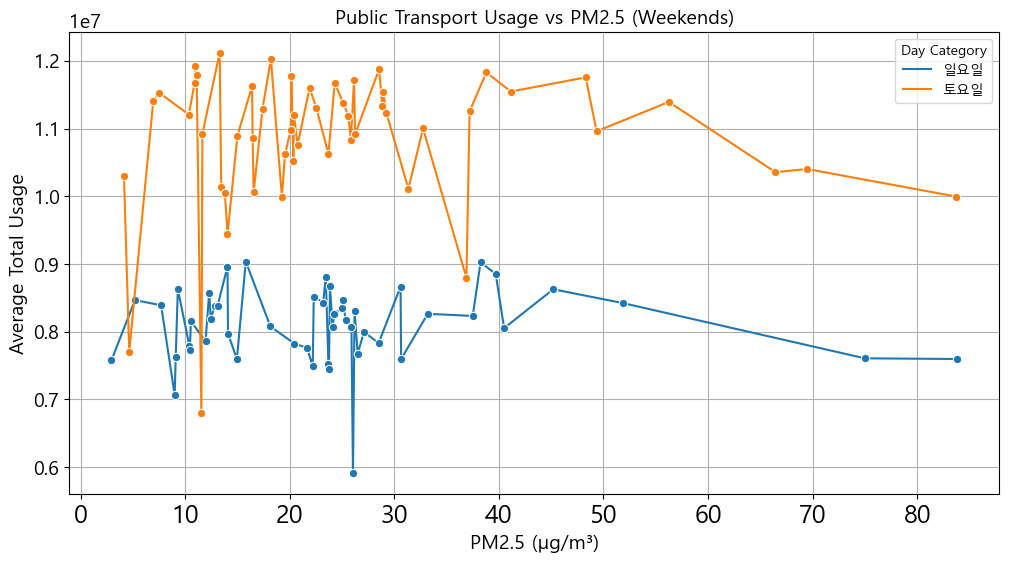

In [47]:
## 토요일, 일요일 별 미세먼지별 총이용인원 수
# Grouping data by '요일구분' and pollutants for visualization
pm10_data_weekend = merged_data_weekend.groupby(['요일', '미세먼지_PM10'])['총이용인원'].mean().reset_index()
pm25_data_weekend = merged_data_weekend.groupby(['요일', '초미세먼지_PM25'])['총이용인원'].mean().reset_index()

# Plotting PM10
plt.figure(figsize=(12, 6))
sns.lineplot(data=pm10_data_weekend, x='미세먼지_PM10', y='총이용인원', hue='요일', marker='o')
plt.title("Public Transport Usage vs PM10 (Weekends)", fontsize=14)
plt.xlabel("PM10 (μg/m³)")
plt.ylabel("Average Total Usage")
plt.legend(title="Day Category")
plt.grid(True)
plt.show()

# Plotting PM2.5
plt.figure(figsize=(12, 6))
sns.lineplot(data=pm25_data_weekend, x='초미세먼지_PM25', y='총이용인원', hue='요일', marker='o')
plt.title("Public Transport Usage vs PM2.5 (Weekends)", fontsize=14)
plt.xlabel("PM2.5 (μg/m³)")
plt.ylabel("Average Total Usage")
plt.legend(title="Day Category")
plt.grid(True)
plt.show()

In [48]:
## 평일의 총이용인원(버스 + 지하철) 구하기 
# 날짜를 기준으로 병합
merged_data_weekday = pd.merge(air_bus_weekday_cleaned, air_sub_weekday_cleaned, on='날짜', how='inner')

# 불필요한 중복 열 제거
merged_data_weekday = merged_data_weekday.drop(columns=['요일_y', '요일구분_y', '미세먼지(PM10)_y', '초미세먼지(PM25)_y', '미세먼지 등급_y', '초미세먼지 등급_y'])

# rename
merged_data_weekday.rename(columns={
    '요일_x': '요일',
    '요일구분_x': '요일구분',
    '초미세먼지(PM25)_x': '초미세먼지_PM25',
    '미세먼지(PM10)_x': '미세먼지_PM10',
    '미세먼지 등급_x': '미세먼지 등급',
    '초미세먼지 등급_x': '초미세먼지 등급',
}, inplace=True)

merged_data_weekday

,날짜,미세먼지_PM10,초미세먼지_PM25,미세먼지 등급,초미세먼지 등급,버스이용인원,요일,요일구분,지하철이용인원
0,2019-01-02,35.55,22.90,보통,보통,5328586,수요일,평일,7621668
1,2019-01-03,39.95,24.20,보통,보통,5457074,목요일,평일,7873692
2,2019-01-04,61.05,42.25,보통,나쁨,5613975,금요일,평일,8270345
3,2019-01-07,59.35,39.00,보통,나쁨,5454007,월요일,평일,7824428
4,2019-01-08,42.30,18.20,보통,보통,5521912,화요일,평일,7913162
...,...,...,...,...,...,...,...,...,...
241,2019-12-24,69.45,52.15,보통,나쁨,6022560,화요일,평일,8843820
242,2019-12-26,49.65,34.45,보통,보통,5765125,목요일,평일,8270786
243,2019-12-27,34.80,23.65,보통,보통,5930615,금요일,평일,8641121
244,2019-12-30,37.95,26.45,보통,보통,5593464,월요일,평일,8059114


In [49]:
# 병합 후 총 대중교통 이용량 계산
merged_data_weekday['총이용인원'] = merged_data_weekday['버스이용인원'] + merged_data_weekday['지하철이용인원']
merged_data_weekday

,날짜,미세먼지_PM10,초미세먼지_PM25,미세먼지 등급,초미세먼지 등급,버스이용인원,요일,요일구분,지하철이용인원,총이용인원
0,2019-01-02,35.55,22.90,보통,보통,5328586,수요일,평일,7621668,12950254
1,2019-01-03,39.95,24.20,보통,보통,5457074,목요일,평일,7873692,13330766
2,2019-01-04,61.05,42.25,보통,나쁨,5613975,금요일,평일,8270345,13884320
3,2019-01-07,59.35,39.00,보통,나쁨,5454007,월요일,평일,7824428,13278435
4,2019-01-08,42.30,18.20,보통,보통,5521912,화요일,평일,7913162,13435074
...,...,...,...,...,...,...,...,...,...,...
241,2019-12-24,69.45,52.15,보통,나쁨,6022560,화요일,평일,8843820,14866380
242,2019-12-26,49.65,34.45,보통,보통,5765125,목요일,평일,8270786,14035911
243,2019-12-27,34.80,23.65,보통,보통,5930615,금요일,평일,8641121,14571736
244,2019-12-30,37.95,26.45,보통,보통,5593464,월요일,평일,8059114,13652578


In [50]:
# 상관계수 계산
merged_data_weekday[['미세먼지_PM10', '초미세먼지_PM25', '지하철이용인원', '버스이용인원', '총이용인원']].corr()

,미세먼지_PM10,초미세먼지_PM25,지하철이용인원,버스이용인원,총이용인원
미세먼지_PM10,1.000000,0.909246,0.060471,-0.049883,0.021686
초미세먼지_PM25,0.909246,1.000000,0.000010,-0.062803,-0.023105
지하철이용인원,0.060471,0.000010,1.000000,0.874221,0.983908
버스이용인원,-0.049883,-0.062803,0.874221,1.000000,0.946905
총이용인원,0.021686,-0.023105,0.983908,0.946905,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


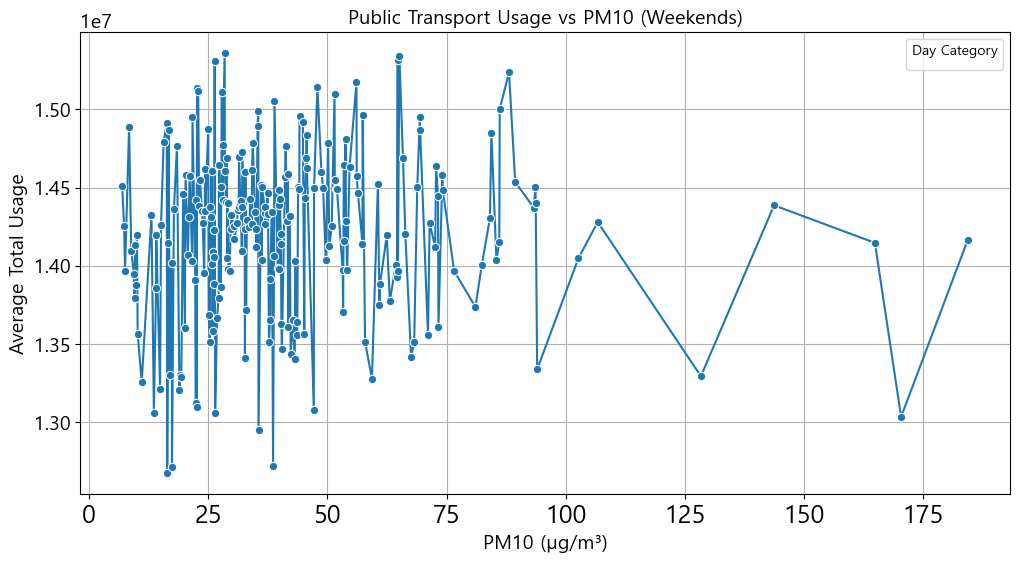

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


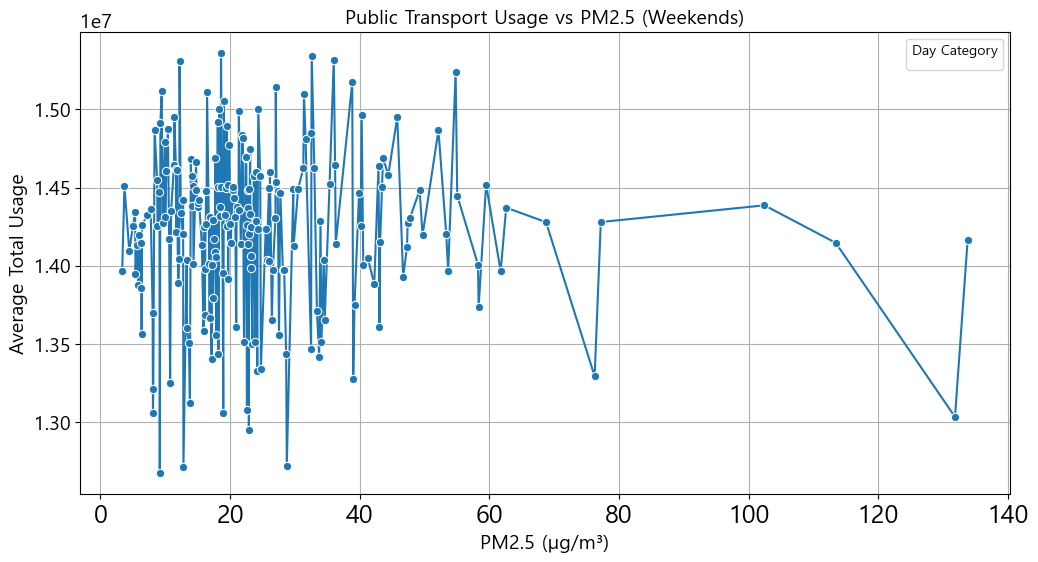

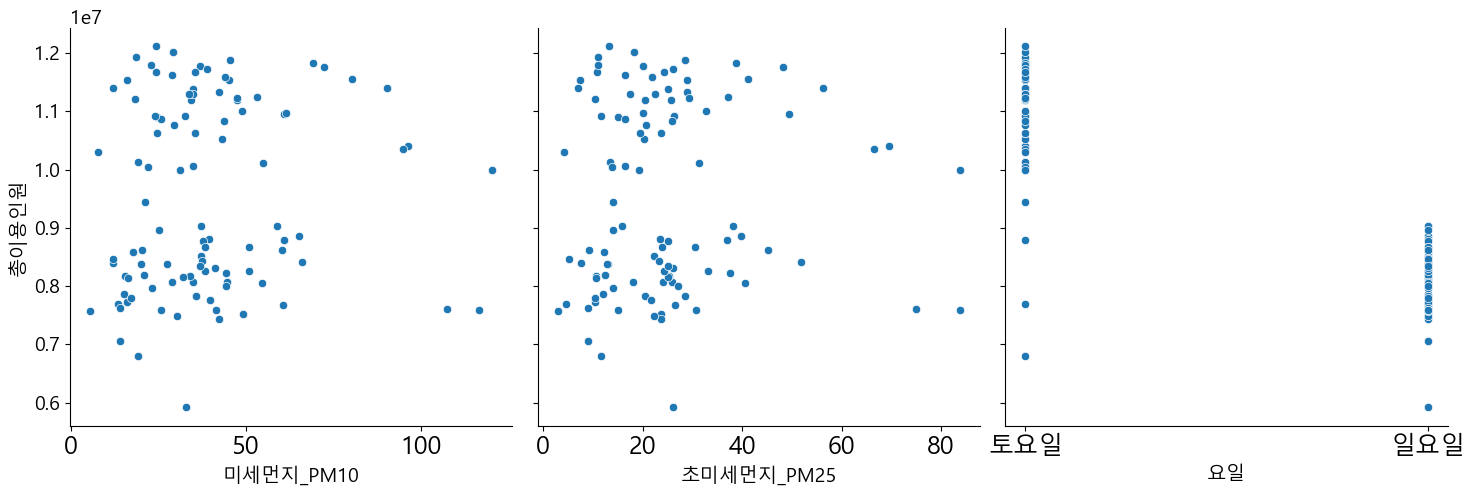

In [51]:
## 평일의 미세먼지별 총이용인원 수
# Grouping data by '요일구분' and pollutants for visualization
pm10_data_weekday = merged_data_weekday.groupby('미세먼지_PM10')['총이용인원'].mean().reset_index()
pm25_data_weekday = merged_data_weekday.groupby('초미세먼지_PM25')['총이용인원'].mean().reset_index()

# Plotting PM10
plt.figure(figsize=(12, 6))
sns.lineplot(data=pm10_data_weekday, x='미세먼지_PM10', y='총이용인원', marker='o')
plt.title("Public Transport Usage vs PM10 (Weekends)", fontsize=14)
plt.xlabel("PM10 (μg/m³)")
plt.ylabel("Average Total Usage")
plt.legend(title="Day Category")
plt.grid(True)
plt.show()

# Plotting PM2.5
plt.figure(figsize=(12, 6))
sns.lineplot(data=pm25_data_weekday, x='초미세먼지_PM25', y='총이용인원', marker='o')
plt.title("Public Transport Usage vs PM2.5 (Weekends)", fontsize=14)
plt.xlabel("PM2.5 (μg/m³)")
plt.ylabel("Average Total Usage")
plt.legend(title="Day Category")
plt.grid(True)
plt.show()

sns.pairplot(merged_data_weekend, x_vars=['미세먼지_PM10', '초미세먼지_PM25',"요일"], y_vars='총이용인원', height=5, aspect=1, kind='scatter')

## 버스 + 평일 Regression
Y = 버스이용인원 <br>
X = 미세먼지_PM10 + 초미세먼지_PM25

In [25]:
air_bus_weekday_cleaned

,날짜,미세먼지(PM10),초미세먼지(PM25),미세먼지 등급,초미세먼지 등급,버스이용인원,요일,요일구분
1,2019-01-02,35.55,22.90,보통,보통,5328586,수요일,평일
2,2019-01-03,39.95,24.20,보통,보통,5457074,목요일,평일
3,2019-01-04,61.05,42.25,보통,나쁨,5613975,금요일,평일
6,2019-01-07,59.35,39.00,보통,나쁨,5454007,월요일,평일
7,2019-01-08,42.30,18.20,보통,보통,5521912,화요일,평일
...,...,...,...,...,...,...,...,...
357,2019-12-24,69.45,52.15,보통,나쁨,6022560,화요일,평일
359,2019-12-26,49.65,34.45,보통,보통,5765125,목요일,평일
360,2019-12-27,34.80,23.65,보통,보통,5930615,금요일,평일
363,2019-12-30,37.95,26.45,보통,보통,5593464,월요일,평일


In [53]:
# rename
air_bus_weekday_cleaned.rename(columns={
    '초미세먼지(PM25)': '초미세먼지_PM25',
    '미세먼지(PM10)': '미세먼지_PM10',
}, inplace=True)

air_bus_weekday_cleaned

,날짜,미세먼지_PM10,초미세먼지_PM25,미세먼지 등급,초미세먼지 등급,버스이용인원,요일,요일구분
1,2019-01-02,35.55,22.90,보통,보통,5328586,수요일,평일
2,2019-01-03,39.95,24.20,보통,보통,5457074,목요일,평일
3,2019-01-04,61.05,42.25,보통,나쁨,5613975,금요일,평일
6,2019-01-07,59.35,39.00,보통,나쁨,5454007,월요일,평일
7,2019-01-08,42.30,18.20,보통,보통,5521912,화요일,평일
...,...,...,...,...,...,...,...,...
357,2019-12-24,69.45,52.15,보통,나쁨,6022560,화요일,평일
359,2019-12-26,49.65,34.45,보통,보통,5765125,목요일,평일
360,2019-12-27,34.80,23.65,보통,보통,5930615,금요일,평일
363,2019-12-30,37.95,26.45,보통,보통,5593464,월요일,평일


In [55]:
bus_weekday_lr2 = smf.ols("버스이용인원 ~ 미세먼지_PM10+ 초미세먼지_PM25", data=air_bus_weekday_cleaned).fit()
bus_weekday_lr2.params

Intercept     5.870226e+06
미세먼지_PM10     3.072231e+02
초미세먼지_PM25   -1.075858e+03
dtype: float64

In [56]:
bus_weekday_lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 버스이용인원   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5180
Date:                Thu, 12 Dec 2024   Prob (F-statistic):              0.596
Time:                        19:40:36   Log-Likelihood:                -3346.9
No. Observations:                 246   AIC:                             6700.
Df Residuals:                     243   BIC:                             6710.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.87e+06   2.39e+04    245.330      0.000    5.82e+06    5.92e+06
미세먼지_PM10    307.2231   1133.726      0.271      0.787   -1925.961    2540.407
초미세먼지_PM25 -1075.8584   1643.088     -0.655      0.513   -4312.371    2160.654
==============================================================================
Omnibus:                       20.296   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.620
Skew:                          -0.759   Prob(JB):                     7.43e-06
Kurtosis:                       2.988   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared (R²): 0.004 << 모델 설명력이 매우 낮음 <br>
Adj. R-squared (조정된 R²): -0.004 << 조정해도 매우 낮음 <br>
F-statistic: 0.5180 (p-value = 0.596) << 모델 전체가 통계적으로 유의미하지 않음..
<br>
<br>
=> 독립 변수(미세먼지_PM10, 초미세먼지_PM25)들이 버스이용인원을 설명하는 데 충분하지 않음

## 버스 + 토요일 Regression
Y = 버스이용인원 <br>
X = 미세먼지_PM10 + 초미세먼지_PM25

In [30]:
air_bus_weekend_cleaned_sat 

,날짜,미세먼지(PM10),초미세먼지(PM25),미세먼지 등급,초미세먼지 등급,버스이용인원,요일,요일구분
4,2019-01-05,54.85,31.35,보통,보통,4050127,토요일,주말
11,2019-01-12,96.20,69.50,나쁨,나쁨,4119460,토요일,주말
18,2019-01-19,94.80,66.45,나쁨,나쁨,4096367,토요일,주말
25,2019-01-26,43.10,20.35,보통,보통,4177212,토요일,주말
32,2019-02-02,60.75,36.90,보통,나쁨,3715619,토요일,주말
39,2019-02-09,35.00,16.55,보통,보통,4055163,토요일,주말
46,2019-02-16,60.90,49.35,보통,나쁨,4340458,토요일,주말
53,2019-02-23,53.10,37.20,보통,나쁨,4449429,토요일,주말
60,2019-03-02,120.35,83.75,나쁨,매우나쁨,4073504,토요일,주말
67,2019-03-09,45.20,28.95,보통,보통,4581089,토요일,주말


In [31]:
# rename
air_bus_weekend_cleaned_sat.rename(columns={
    '초미세먼지(PM25)': '초미세먼지_PM25',
    '미세먼지(PM10)': '미세먼지_PM10',
}, inplace=True)

air_bus_weekend_cleaned_sat

,날짜,미세먼지_PM10,초미세먼지_PM25,미세먼지 등급,초미세먼지 등급,버스이용인원,요일,요일구분
4,2019-01-05,54.85,31.35,보통,보통,4050127,토요일,주말
11,2019-01-12,96.20,69.50,나쁨,나쁨,4119460,토요일,주말
18,2019-01-19,94.80,66.45,나쁨,나쁨,4096367,토요일,주말
25,2019-01-26,43.10,20.35,보통,보통,4177212,토요일,주말
32,2019-02-02,60.75,36.90,보통,나쁨,3715619,토요일,주말
39,2019-02-09,35.00,16.55,보통,보통,4055163,토요일,주말
46,2019-02-16,60.90,49.35,보통,나쁨,4340458,토요일,주말
53,2019-02-23,53.10,37.20,보통,나쁨,4449429,토요일,주말
60,2019-03-02,120.35,83.75,나쁨,매우나쁨,4073504,토요일,주말
67,2019-03-09,45.20,28.95,보통,보통,4581089,토요일,주말


In [32]:
bus_weekend_sat_lr2 = smf.ols("버스이용인원 ~ 미세먼지_PM10+ 초미세먼지_PM25", data=air_bus_weekend_cleaned_sat).fit()
bus_weekend_sat_lr2.params

Intercept     4.337750e+06
미세먼지_PM10     2.769102e+03
초미세먼지_PM25   -4.233354e+03
dtype: float64

In [33]:
bus_weekend_sat_lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 버스이용인원   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                   0.07168
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.931
Time:                        20:04:52   Log-Likelihood:                -738.17
No. Observations:                  52   AIC:                             1482.
Df Residuals:                      49   BIC:                             1488.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.338e+06   1.05e+05     41.453      0.000    4.13e+06    4.55e+06
미세먼지_PM10   2769.1017   7825.484      0.354      0.725    -1.3e+04    1.85e+04
초미세먼지_PM25 -4233.3543   1.12e+04     -0.377      0.708   -2.68e+04    1.83e+04
==============================================================================
Omnibus:                       49.861   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.798
Skew:                          -2.595   Prob(JB):                     1.87e-48
Kurtosis:                      11.632   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 버스 + 일요일 Regression
Y = 버스이용인원 <br>
X = 미세먼지_PM10 + 초미세먼지_PM25

In [34]:
air_bus_weekend_cleaned_sun

,날짜,미세먼지(PM10),초미세먼지(PM25),미세먼지 등급,초미세먼지 등급,버스이용인원,요일,요일구분
5,2019-01-06,49.10,23.70,보통,보통,3118038,일요일,주말
12,2019-01-13,116.50,83.80,나쁨,매우나쁨,3095130,일요일,주말
19,2019-01-20,60.70,26.50,보통,보통,3143037,일요일,주말
26,2019-01-27,35.65,20.45,보통,보통,3187519,일요일,주말
33,2019-02-03,32.90,26.05,보통,보통,2504108,일요일,주말
40,2019-02-10,42.20,23.75,보통,보통,3080864,일요일,주말
47,2019-02-17,34.85,24.10,보통,보통,3316684,일요일,주말
54,2019-02-24,66.00,51.90,보통,나쁨,3435491,일요일,주말
61,2019-03-03,107.45,75.00,나쁨,나쁨,2958528,일요일,주말
68,2019-03-10,51.00,33.20,보통,보통,3382373,일요일,주말


In [35]:
# rename
air_bus_weekend_cleaned_sun.rename(columns={
    '초미세먼지(PM25)': '초미세먼지_PM25',
    '미세먼지(PM10)': '미세먼지_PM10',
}, inplace=True)

air_bus_weekend_cleaned_sun

,날짜,미세먼지_PM10,초미세먼지_PM25,미세먼지 등급,초미세먼지 등급,버스이용인원,요일,요일구분
5,2019-01-06,49.10,23.70,보통,보통,3118038,일요일,주말
12,2019-01-13,116.50,83.80,나쁨,매우나쁨,3095130,일요일,주말
19,2019-01-20,60.70,26.50,보통,보통,3143037,일요일,주말
26,2019-01-27,35.65,20.45,보통,보통,3187519,일요일,주말
33,2019-02-03,32.90,26.05,보통,보통,2504108,일요일,주말
40,2019-02-10,42.20,23.75,보통,보통,3080864,일요일,주말
47,2019-02-17,34.85,24.10,보통,보통,3316684,일요일,주말
54,2019-02-24,66.00,51.90,보통,나쁨,3435491,일요일,주말
61,2019-03-03,107.45,75.00,나쁨,나쁨,2958528,일요일,주말
68,2019-03-10,51.00,33.20,보통,보통,3382373,일요일,주말


In [36]:
bus_weekend_sun_lr2 = smf.ols("버스이용인원 ~ 미세먼지_PM10+ 초미세먼지_PM25", data=air_bus_weekend_cleaned_sun).fit()
bus_weekend_sun_lr2.params

Intercept     3.357776e+06
미세먼지_PM10     3.679009e+03
초미세먼지_PM25   -6.630371e+03
dtype: float64

In [37]:
bus_weekend_sun_lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 버스이용인원   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.5877
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.559
Time:                        20:06:28   Log-Likelihood:                -711.52
No. Observations:                  52   AIC:                             1429.
Df Residuals:                      49   BIC:                             1435.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.358e+06    6.3e+04     53.285      0.000    3.23e+06    3.48e+06
미세먼지_PM10   3679.0095   5611.051      0.656      0.515   -7596.820     1.5e+04
초미세먼지_PM25 -6630.3712   7752.957     -0.855      0.397   -2.22e+04    8949.779
==============================================================================
Omnibus:                       15.148   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.528
Skew:                          -1.038   Prob(JB):                     5.75e-05
Kurtosis:                       5.168   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 지하철 + 평일 Regression
Y = 지하철이용인원 <br>
X = 미세먼지_PM10 + 초미세먼지_PM25

In [38]:
air_sub_weekday_cleaned

,날짜,미세먼지(PM10),초미세먼지(PM25),미세먼지 등급,초미세먼지 등급,지하철이용인원,요일,요일구분
1,2019-01-02,35.55,22.90,보통,보통,7621668,수요일,평일
2,2019-01-03,39.95,24.20,보통,보통,7873692,목요일,평일
3,2019-01-04,61.05,42.25,보통,나쁨,8270345,금요일,평일
6,2019-01-07,59.35,39.00,보통,나쁨,7824428,월요일,평일
7,2019-01-08,42.30,18.20,보통,보통,7913162,화요일,평일
...,...,...,...,...,...,...,...,...
357,2019-12-24,69.45,52.15,보통,나쁨,8843820,화요일,평일
359,2019-12-26,49.65,34.45,보통,보통,8270786,목요일,평일
360,2019-12-27,34.80,23.65,보통,보통,8641121,금요일,평일
363,2019-12-30,37.95,26.45,보통,보통,8059114,월요일,평일


In [39]:
# rename
air_sub_weekday_cleaned.rename(columns={
    '초미세먼지(PM25)': '초미세먼지_PM25',
    '미세먼지(PM10)': '미세먼지_PM10',
}, inplace=True)

air_sub_weekday_cleaned

,날짜,미세먼지_PM10,초미세먼지_PM25,미세먼지 등급,초미세먼지 등급,지하철이용인원,요일,요일구분
1,2019-01-02,35.55,22.90,보통,보통,7621668,수요일,평일
2,2019-01-03,39.95,24.20,보통,보통,7873692,목요일,평일
3,2019-01-04,61.05,42.25,보통,나쁨,8270345,금요일,평일
6,2019-01-07,59.35,39.00,보통,나쁨,7824428,월요일,평일
7,2019-01-08,42.30,18.20,보통,보통,7913162,화요일,평일
...,...,...,...,...,...,...,...,...
357,2019-12-24,69.45,52.15,보통,나쁨,8843820,화요일,평일
359,2019-12-26,49.65,34.45,보통,보통,8270786,목요일,평일
360,2019-12-27,34.80,23.65,보통,보통,8641121,금요일,평일
363,2019-12-30,37.95,26.45,보통,보통,8059114,월요일,평일


In [40]:
sub_weekday_lr2 = smf.ols("지하철이용인원 ~ 미세먼지_PM10+ 초미세먼지_PM25", data=air_sub_weekday_cleaned).fit()
sub_weekday_lr2.params

Intercept     8.310435e+06
미세먼지_PM10     4.484587e+03
초미세먼지_PM25   -5.979286e+03
dtype: float64

In [41]:
sub_weekday_lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                지하철이용인원   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.396
Date:                Mon, 09 Dec 2024   Prob (F-statistic):             0.0933
Time:                        20:07:17   Log-Likelihood:                -3506.8
No. Observations:                 247   AIC:                             7020.
Df Residuals:                     244   BIC:                             7030.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    8.31e+06   4.33e+04    192.068      0.000    8.23e+06     8.4e+06
미세먼지_PM10   4484.5867   2049.456      2.188      0.030     447.703    8521.471
초미세먼지_PM25 -5979.2860   2970.900     -2.013      0.045   -1.18e+04    -127.404
==============================================================================
Omnibus:                        3.481   Durbin-Watson:                   1.013
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                3.245
Skew:                          -0.278   Prob(JB):                        0.197
Kurtosis:                       3.084   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 지하철 + 토요일 Regression
Y = 지하철이용인원 <br>
X = 미세먼지_PM10 + 초미세먼지_PM25

In [42]:
air_sub_weekend_cleaned_sat

,날짜,미세먼지(PM10),초미세먼지(PM25),미세먼지 등급,초미세먼지 등급,지하철이용인원,요일,요일구분
4,2019-01-05,54.85,31.35,보통,보통,6062294,토요일,주말
11,2019-01-12,96.20,69.50,나쁨,나쁨,6282189,토요일,주말
18,2019-01-19,94.80,66.45,나쁨,나쁨,6259796,토요일,주말
25,2019-01-26,43.10,20.35,보통,보통,6350557,토요일,주말
32,2019-02-02,60.75,36.90,보통,나쁨,5079486,토요일,주말
39,2019-02-09,35.00,16.55,보통,보통,6002458,토요일,주말
46,2019-02-16,60.90,49.35,보통,나쁨,6619046,토요일,주말
53,2019-02-23,53.10,37.20,보통,나쁨,6803807,토요일,주말
60,2019-03-02,120.35,83.75,나쁨,매우나쁨,5921798,토요일,주말
67,2019-03-09,45.20,28.95,보통,보통,6954483,토요일,주말


In [43]:
# rename
air_sub_weekend_cleaned_sat.rename(columns={
    '초미세먼지(PM25)': '초미세먼지_PM25',
    '미세먼지(PM10)': '미세먼지_PM10',
}, inplace=True)

air_sub_weekend_cleaned_sat

,날짜,미세먼지_PM10,초미세먼지_PM25,미세먼지 등급,초미세먼지 등급,지하철이용인원,요일,요일구분
4,2019-01-05,54.85,31.35,보통,보통,6062294,토요일,주말
11,2019-01-12,96.20,69.50,나쁨,나쁨,6282189,토요일,주말
18,2019-01-19,94.80,66.45,나쁨,나쁨,6259796,토요일,주말
25,2019-01-26,43.10,20.35,보통,보통,6350557,토요일,주말
32,2019-02-02,60.75,36.90,보통,나쁨,5079486,토요일,주말
39,2019-02-09,35.00,16.55,보통,보통,6002458,토요일,주말
46,2019-02-16,60.90,49.35,보통,나쁨,6619046,토요일,주말
53,2019-02-23,53.10,37.20,보통,나쁨,6803807,토요일,주말
60,2019-03-02,120.35,83.75,나쁨,매우나쁨,5921798,토요일,주말
67,2019-03-09,45.20,28.95,보통,보통,6954483,토요일,주말


In [44]:
sub_weekend_sat_lr2 = smf.ols("지하철이용인원 ~ 미세먼지_PM10+ 초미세먼지_PM25", data=air_sub_weekend_cleaned_sat).fit()
sub_weekend_sat_lr2.params

Intercept     6.406504e+06
미세먼지_PM10     1.243378e+04
초미세먼지_PM25   -1.470066e+04
dtype: float64

In [45]:
sub_weekend_sat_lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                지하철이용인원   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.4500
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.640
Time:                        20:08:54   Log-Likelihood:                -770.74
No. Observations:                  52   AIC:                             1547.
Df Residuals:                      49   BIC:                             1553.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.407e+06   1.96e+05     32.730      0.000    6.01e+06     6.8e+06
미세먼지_PM10   1.243e+04   1.46e+04      0.849      0.400    -1.7e+04    4.18e+04
초미세먼지_PM25  -1.47e+04    2.1e+04     -0.700      0.487   -5.69e+04    2.75e+04
==============================================================================
Omnibus:                       24.823   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.129
Skew:                          -1.582   Prob(JB):                     1.93e-09
Kurtosis:                       5.918   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 지하철 + 일요일 Regression
Y = 지하철이용인원 <br>
X = 미세먼지_PM10 + 초미세먼지_PM25

In [46]:
# rename
air_sub_weekend_cleaned_sun.rename(columns={
    '초미세먼지(PM25)': '초미세먼지_PM25',
    '미세먼지(PM10)': '미세먼지_PM10',
}, inplace=True)

air_sub_weekend_cleaned_sun

,날짜,미세먼지_PM10,초미세먼지_PM25,미세먼지 등급,초미세먼지 등급,지하철이용인원,요일,요일구분
5,2019-01-06,49.10,23.70,보통,보통,4408718,일요일,주말
12,2019-01-13,116.50,83.80,나쁨,매우나쁨,4501053,일요일,주말
19,2019-01-20,60.70,26.50,보통,보통,4530960,일요일,주말
26,2019-01-27,35.65,20.45,보통,보통,4635486,일요일,주말
33,2019-02-03,32.90,26.05,보통,보통,3412440,일요일,주말
40,2019-02-10,42.20,23.75,보통,보통,4360767,일요일,주말
47,2019-02-17,34.85,24.10,보통,보통,4745767,일요일,주말
54,2019-02-24,66.00,51.90,보통,나쁨,4985414,일요일,주말
61,2019-03-03,107.45,75.00,나쁨,나쁨,4647568,일요일,주말
68,2019-03-10,51.00,33.20,보통,보통,4881761,일요일,주말


In [47]:
sub_weekend_sun_lr2 = smf.ols("지하철이용인원 ~ 미세먼지_PM10+ 초미세먼지_PM25", data=air_sub_weekend_cleaned_sun).fit()
sub_weekend_sun_lr2.params

Intercept     4.682890e+06
미세먼지_PM10     1.329379e+04
초미세먼지_PM25   -1.680261e+04
dtype: float64

In [48]:
sub_weekend_sun_lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                지하철이용인원   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.145
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.327
Time:                        20:09:42   Log-Likelihood:                -735.87
No. Observations:                  52   AIC:                             1478.
Df Residuals:                      49   BIC:                             1484.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.683e+06   1.01e+05     46.522      0.000    4.48e+06    4.89e+06
미세먼지_PM10   1.329e+04   8962.977      1.483      0.144   -4717.984    3.13e+04
초미세먼지_PM25  -1.68e+04   1.24e+04     -1.357      0.181   -4.17e+04    8084.799
==============================================================================
Omnibus:                       13.689   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.805
Skew:                          -0.964   Prob(JB):                     0.000224
Kurtosis:                       5.010   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression 결과
**버스의 (평일, 토요일, 일요일)과 지하철의 (평일, 토요일, 일요일)별로 회귀분석을 돌려본 결과 보고서**
1. R-squared 값은 매우 낮아, 독립 변수들이 종속 변수(지하철 이용 인원)의 변동성을 설명하는 데 제한적임
2. Adjusted R-squared 값 역시 낮아, 조정되더라도 모델의 설명력이 크게 개선되지 않았음
3. F-statistic: 모델 전체가 통계적으로 유의미하지 않음
4. p-value가 0.05보다 모두 크기 때문에 통계적으로 유의미한 관계가 없다고 봄.

### 결론
1. 회귀 분석에서 사용된 변수들(미세먼지 농도, 초미세먼지 농도)은 이용 인원에 유의미한 영향을 미치지 않는다.
2. R-squared 값이 낮고, p-value 값이 높기에, 미세먼지와 초미세먼지 농도가 대중교통 이용량의 주요 설명 변수가 아니다.

# 최종 결론
    가설 검정- 미세먼지가 대중교통 이용량에 영향을 미치지 않는다는 귀무가설을 기각하지 못함
    회귀 분석- 미세먼지는 이용 인원에 대해 유의미한 영향을 미치지 않는다
o	미세먼지와 대중교통 이용량 간의 관계
    분석 결과, 미세먼지 농도 및 등급이 대중교통 이용량(버스 및 지하철)에 유의미한 영향을 미친다는 근거를 발견하지 못함.